In [1]:
with open('examiner-headlines.txt', encoding='utf8') as f:
    content = f.readlines()
headlines = [x.strip() for x in content] 

In [3]:
import spacy
nlp = spacy.load('en')

In [ ]:
parsed_sentence = self.nlp(sent)
for token in parsed_sentence:

In [13]:
#Wiki test
import tagme
tagme.GCUBE_TOKEN = "c294fe63-88fa-40e1-b1d4-34b70c887b29-843339462"

lunch_annotations = tagme.annotate("Barack Obama eats Mexican burritos.")
for ann in lunch_annotations.get_annotations(0.1):
    print(ann)

lunch_annotations = tagme.annotate("My favourite meal is Mexican burritos.")
for ann in lunch_annotations.get_annotations(0.1):
    print(ann)
    
tomatoes_mentions = tagme.mentions("I definitely like ice cream better than tomatoes.")

for mention in tomatoes_mentions.mentions:
    print(mention)
    
# Get relatedness between a pair of entities specified by title.
rels = tagme.relatedness_title(("Barack Obama", "Italy"))
print("Obama and italy have a semantic relation of", rels.relatedness[0].rel)

# Get relatedness between a pair of entities specified by Wikipedia ID.
rels = tagme.relatedness_wid((31717, 534366))
print("IDs 31717 and 534366 have a semantic relation of ", rels.relatedness[0].rel)

# Get relatedness between three pairs of entities specified by title.
# The last entity does not exist, hence the value for that pair will be None.
rels = tagme.relatedness_title([("Barack_Obama", "Italy"),
                                ("Italy", "Germany"),
                                ("Italy", "BAD ENTITY NAME")])
for rel in rels.relatedness:
    print(rel)

Barack Obama -> Barack Obama (score: 0.5777451992034912)
eats -> Cannibalism (score: 0.15737806260585785)
Mexican -> Mexican cuisine (score: 0.3538387715816498)
burritos -> Burrito (score: 0.2809087634086609)
meal -> Meal (score: 0.2014230340719223)
Mexican -> Mexican cuisine (score: 0.36614900827407837)
burritos -> Burrito (score: 0.28607892990112305)
ice cream [18,27] lp=0.18749085068702698
tomatoes [40,48] lp=0.004235605709254742
Obama and italy have a semantic relation of 0.05192309617996216
IDs 31717 and 534366 have a semantic relation of  0.09577333927154541
Barack Obama, Italy rel=0.05192309617996216
Italy, Germany rel=0.6111182570457458
Italy, BAD ENTITY NAME rel=None


In [51]:
#test santiwordnet

from nltk.corpus import sentiwordnet as swn

breakdown = swn.senti_synset('best.a.01')
print(breakdown)
print('pos_score',breakdown.pos_score())
print('neg_score',breakdown.neg_score())
print('obj_score',breakdown.obj_score())


<best.a.01: PosScore=0.75 NegScore=0.0>
pos_score 0.75
neg_score 0.0
obj_score 0.25


In [84]:
import tagme

class good_title_detector:
    def __init__(self):
        self.nlp = spacy.load('en')
        tagme.GCUBE_TOKEN = "c294fe63-88fa-40e1-b1d4-34b70c887b29-843339462"
        #n - NOUN 
        #v - VERB 
        #a - ADJECTIVE 
        #s - ADJECTIVE SATELLITE 
        #r - ADVERB 
        self.sentiWN_tag_map={}
        self.sentiWN_tag_map['ADV']='r'
        self.sentiWN_tag_map['ADJ']='a'
        self.sentiWN_tag_map['VERB']='v'
        self.sentiWN_tag_map['NOUN']='n' 
    #calculate prominance by wiki
    # get Nouns/entities/persons , and check them in Wiki, get score
    
    def get_spacy_named_entities_count(self, text):
        entity_types=[]
        for item in self.nlp(text):
            if item.ent_type_!='':
                entity_types.append(item.ent_type_)
        return len(entity_types)
    
    def get_wiki_entities_count(self,text):
        return len(list(tagme.annotate(text).get_annotations(0.5)))

    def get_prominance_coef(self, text):
        return (self.get_spacy_named_entities_count(text)+self.get_wiki_entities_count(text))/len(self.nlp(text))

#get sentiment of all words, calculate score by sentiwordnet
    def get_sentiment_score_coef(self, text, coef=0.5):
        pos_scores=[]
        neg_scores=[]
        for item in self.nlp(text):
            if item.pos_ in self.sentiWN_tag_map:
                try:
                    queue='{0}.{1}.0{2}'.format(item.lemma_,sentiWN_tag_map[item.pos_],1)
                    sentiment = swn.senti_synset(queue)
                    neg_scores.append(sentiment.neg_score())
                    pos_scores.append(sentiment.pos_score())      
                except:
                    print('{0}: no santiment'.format(item))
        return  len([i for i in pos_scores if i > coef]) + len([i for i in neg_scores if i > coef])
                
#get Superlativnes, detect specific part of speach tags
    def get_superlativnes_count(self, text):
        superlativnes=[]
        for item in self.nlp(text):
            if item.tag_ in ['JJS','JJR']:
                superlativnes.append(item)
        return len(superlativnes)
    
    def detect(self, text):
        prominance_coef = self.get_prominance_coef(text)
        sentiment_count = self.get_sentiment_score_coef(text)
        superlativnes_count = self.get_superlativnes_count(text)
        return [prominance_coef, sentiment_count, superlativnes_count]

In [ ]:
len(headlines)

In [86]:
from tqdm import tqdm

In [87]:
detector=good_title_detector()
result = []
for i in tqdm(range(0,len(headlines))):
    result.append(detector.detect(headlines[i]))

  0%|          | 0/5000 [00:00<?, ?it/s]

Errani: no santiment


  0%|          | 2/5000 [00:00<22:19,  3.73it/s]

Talladega: no santiment
could: no santiment


  0%|          | 6/5000 [00:01<22:02,  3.78it/s]

Cal: no santiment


  0%|          | 8/5000 [00:02<22:02,  3.77it/s]

what: no santiment


  0%|          | 11/5000 [00:02<21:47,  3.82it/s]

your: no santiment


  0%|          | 12/5000 [00:03<21:44,  3.82it/s]

repurposed: no santiment


  0%|          | 13/5000 [00:03<21:38,  3.84it/s]

where: no santiment


  0%|          | 14/5000 [00:03<21:40,  3.83it/s]

E3: no santiment


  0%|          | 17/5000 [00:04<21:21,  3.89it/s]

their: no santiment


  0%|          | 18/5000 [00:04<21:17,  3.90it/s]

Sweeter: no santiment


  0%|          | 20/5000 [00:05<21:33,  3.85it/s]

how: no santiment
sf: no santiment
removal: no santiment


  0%|          | 21/5000 [00:05<21:32,  3.85it/s]

gluten: no santiment


  0%|          | 22/5000 [00:05<21:35,  3.84it/s]

My: no santiment


  1%|          | 27/5000 [00:06<21:28,  3.86it/s]

fiancée: no santiment


  1%|          | 28/5000 [00:07<21:29,  3.86it/s]

mainstream: no santiment


  1%|          | 29/5000 [00:07<21:40,  3.82it/s]

her: no santiment


  1%|          | 30/5000 [00:07<21:38,  3.83it/s]

Tekkoshocon: no santiment
AMV: no santiment


  1%|          | 33/5000 [00:08<21:36,  3.83it/s]

Tinkerbell: no santiment


  1%|          | 39/5000 [00:10<21:29,  3.85it/s]

How: no santiment


  1%|          | 41/5000 [00:10<21:26,  3.85it/s]

Psych: no santiment
Psych: no santiment


  1%|          | 43/5000 [00:11<21:23,  3.86it/s]

What: no santiment


  1%|          | 47/5000 [00:12<21:40,  3.81it/s]

must: no santiment


  1%|          | 51/5000 [00:13<21:37,  3.81it/s]

fi: no santiment


  1%|          | 53/5000 [00:13<21:38,  3.81it/s]

topless: no santiment


  1%|          | 56/5000 [00:14<21:37,  3.81it/s]

Yoko: no santiment


  1%|          | 57/5000 [00:15<21:53,  3.76it/s]

vegetarian: no santiment


  1%|          | 61/5000 [00:16<21:47,  3.78it/s]

What: no santiment


  1%|▏         | 63/5000 [00:16<21:42,  3.79it/s]

What: no santiment


  1%|▏         | 65/5000 [00:17<21:40,  3.80it/s]

DR2: no santiment


  1%|▏         | 66/5000 [00:17<21:39,  3.80it/s]

athletics: no santiment


  2%|▏         | 77/5000 [00:20<21:46,  3.77it/s]

30th: no santiment


  2%|▏         | 82/5000 [00:21<21:37,  3.79it/s]

Bellarmine: no santiment


  2%|▏         | 84/5000 [00:22<21:34,  3.80it/s]

worldwide: no santiment


  2%|▏         | 85/5000 [00:22<21:32,  3.80it/s]

recruiting: no santiment


  2%|▏         | 87/5000 [00:23<21:38,  3.78it/s]

What: no santiment


  2%|▏         | 89/5000 [00:23<21:35,  3.79it/s]

disciplining: no santiment


  2%|▏         | 92/5000 [00:24<21:34,  3.79it/s]

How: no santiment


  2%|▏         | 100/5000 [00:26<21:49,  3.74it/s]

What: no santiment


  2%|▏         | 103/5000 [00:27<21:44,  3.75it/s]

Feely: no santiment


  2%|▏         | 105/5000 [00:28<21:47,  3.74it/s]

Herbed: no santiment
focaccia: no santiment


  2%|▏         | 109/5000 [00:29<21:44,  3.75it/s]

%: no santiment


  2%|▏         | 111/5000 [00:29<21:44,  3.75it/s]

contestant: no santiment


  2%|▏         | 112/5000 [00:29<21:43,  3.75it/s]

UVa: no santiment
how: no santiment
your: no santiment


  2%|▏         | 114/5000 [00:30<21:49,  3.73it/s]

Bioware: no santiment
customization: no santiment


  2%|▏         | 115/5000 [00:30<21:48,  3.73it/s]

Dowling: no santiment


  2%|▏         | 121/5000 [00:32<21:49,  3.73it/s]

Duggars: no santiment


  3%|▎         | 126/5000 [00:33<21:44,  3.74it/s]

Pre: no santiment


  3%|▎         | 131/5000 [00:34<21:38,  3.75it/s]

blackouts: no santiment


  3%|▎         | 135/5000 [00:35<21:34,  3.76it/s]

online: no santiment


  3%|▎         | 137/5000 [00:36<21:35,  3.75it/s]

featurette: no santiment


  3%|▎         | 138/5000 [00:36<21:33,  3.76it/s]

Lactobacillus: no santiment


  3%|▎         | 139/5000 [00:36<21:33,  3.76it/s]

Must: no santiment
Your: no santiment


  3%|▎         | 145/5000 [00:38<21:29,  3.76it/s]

What: no santiment


  3%|▎         | 146/5000 [00:38<21:28,  3.77it/s]

what: no santiment


  3%|▎         | 150/5000 [00:39<21:25,  3.77it/s]

How: no santiment


  3%|▎         | 154/5000 [00:40<21:21,  3.78it/s]

Bestselling: no santiment


  3%|▎         | 155/5000 [00:40<21:21,  3.78it/s]

your: no santiment


  3%|▎         | 163/5000 [00:42<21:14,  3.80it/s]

cladding: no santiment


  3%|▎         | 164/5000 [00:43<21:13,  3.80it/s]

Something: no santiment
that: no santiment


  3%|▎         | 166/5000 [00:43<21:11,  3.80it/s]

unglues: no santiment


  3%|▎         | 167/5000 [00:43<21:11,  3.80it/s]

slideshow: no santiment


  3%|▎         | 170/5000 [00:44<21:09,  3.81it/s]

ter: no santiment


  3%|▎         | 171/5000 [00:44<21:08,  3.81it/s]

Q1: no santiment


  3%|▎         | 172/5000 [00:45<21:07,  3.81it/s]

leopard: no santiment


  3%|▎         | 173/5000 [00:45<21:07,  3.81it/s]

Anti: no santiment


  3%|▎         | 174/5000 [00:45<21:08,  3.81it/s]

Charice: no santiment


  4%|▎         | 175/5000 [00:45<21:07,  3.81it/s]

%: no santiment


  4%|▎         | 179/5000 [00:46<21:03,  3.82it/s]

your: no santiment


  4%|▎         | 180/5000 [00:47<21:03,  3.81it/s]

carb: no santiment
my: no santiment
anti: no santiment


  4%|▎         | 181/5000 [00:47<21:03,  3.81it/s]

may: no santiment


  4%|▎         | 183/5000 [00:48<21:09,  3.80it/s]

pitbull: no santiment


  4%|▍         | 189/5000 [00:49<21:05,  3.80it/s]

Austin: no santiment


  4%|▍         | 192/5000 [00:50<21:02,  3.81it/s]

anti: no santiment


  4%|▍         | 196/5000 [00:51<21:01,  3.81it/s]

your: no santiment


  4%|▍         | 210/5000 [00:54<20:52,  3.82it/s]

could: no santiment


  4%|▍         | 216/5000 [00:56<20:50,  3.83it/s]

cofee: no santiment


  4%|▍         | 218/5000 [00:56<20:49,  3.83it/s]

How: no santiment


  4%|▍         | 222/5000 [00:57<20:47,  3.83it/s]

6th: no santiment


  5%|▍         | 226/5000 [00:58<20:44,  3.84it/s]

his: no santiment


  5%|▍         | 228/5000 [00:59<20:43,  3.84it/s]

may: no santiment


  5%|▍         | 231/5000 [01:00<20:42,  3.84it/s]

his: no santiment


  5%|▍         | 232/5000 [01:00<20:43,  3.84it/s]

Superheroes: no santiment
Why: no santiment


  5%|▍         | 234/5000 [01:00<20:41,  3.84it/s]

your: no santiment


  5%|▍         | 236/5000 [01:01<20:40,  3.84it/s]

sentencing: no santiment


  5%|▍         | 238/5000 [01:01<20:39,  3.84it/s]

H1N1: no santiment


  5%|▍         | 241/5000 [01:02<20:39,  3.84it/s]

Gilroy: no santiment
undercover: no santiment


  5%|▍         | 246/5000 [01:04<20:39,  3.83it/s]

Rawl: no santiment


  5%|▍         | 247/5000 [01:04<20:39,  3.84it/s]

Pairwise: no santiment


  5%|▍         | 249/5000 [01:04<20:38,  3.84it/s]

AMAs: no santiment


  5%|▌         | 251/5000 [01:05<20:37,  3.84it/s]

Photos: no santiment


  5%|▌         | 255/5000 [01:06<20:35,  3.84it/s]

His: no santiment


  5%|▌         | 259/5000 [01:07<20:33,  3.84it/s]

Acupuncture: no santiment


  5%|▌         | 263/5000 [01:08<20:29,  3.85it/s]

crumble: no santiment


  5%|▌         | 265/5000 [01:08<20:28,  3.85it/s]

Hawkeye: no santiment


  5%|▌         | 268/5000 [01:09<20:28,  3.85it/s]

commits: no santiment


  5%|▌         | 269/5000 [01:09<20:28,  3.85it/s]

guias: no santiment
pollos: no santiment


  5%|▌         | 271/5000 [01:10<20:29,  3.85it/s]

CalWORKS: no santiment


  6%|▌         | 279/5000 [01:12<20:26,  3.85it/s]

Superbowl: no santiment


  6%|▌         | 285/5000 [01:13<20:23,  3.85it/s]

airstrikes: no santiment


  6%|▌         | 294/5000 [01:16<20:26,  3.84it/s]

What: no santiment


  6%|▌         | 295/5000 [01:16<20:26,  3.84it/s]

up: no santiment


  6%|▌         | 303/5000 [01:19<20:31,  3.81it/s]

must: no santiment


  6%|▌         | 304/5000 [01:19<20:30,  3.81it/s]

CANA: no santiment


  6%|▋         | 320/5000 [01:23<20:24,  3.82it/s]

her: no santiment


  7%|▋         | 326/5000 [01:25<20:22,  3.82it/s]

your: no santiment
your: no santiment


  7%|▋         | 328/5000 [01:25<20:21,  3.82it/s]

undead: no santiment
Photos: no santiment


  7%|▋         | 329/5000 [01:26<20:21,  3.82it/s]

would: no santiment


  7%|▋         | 330/5000 [01:26<20:23,  3.82it/s]

his: no santiment


  7%|▋         | 336/5000 [01:27<20:21,  3.82it/s]

Should: no santiment


  7%|▋         | 347/5000 [01:30<20:15,  3.83it/s]

ep: no santiment


  7%|▋         | 363/5000 [01:34<20:10,  3.83it/s]

why: no santiment
should: no santiment


  7%|▋         | 368/5000 [01:35<20:08,  3.83it/s]

could: no santiment


  7%|▋         | 369/5000 [01:36<20:07,  3.83it/s]

How: no santiment


  7%|▋         | 370/5000 [01:36<20:07,  3.84it/s]

celebrates: no santiment


  7%|▋         | 374/5000 [01:37<20:05,  3.84it/s]

what: no santiment


  8%|▊         | 376/5000 [01:38<20:07,  3.83it/s]

your: no santiment


  8%|▊         | 378/5000 [01:38<20:06,  3.83it/s]

Pacquiao: no santiment


  8%|▊         | 383/5000 [01:39<20:04,  3.83it/s]

midseason: no santiment


  8%|▊         | 385/5000 [01:40<20:03,  3.83it/s]

12th: no santiment


  8%|▊         | 387/5000 [01:40<20:03,  3.83it/s]

How: no santiment
Your: no santiment
slays: no santiment


  8%|▊         | 389/5000 [01:41<20:02,  3.83it/s]

that: no santiment
when: no santiment


  8%|▊         | 392/5000 [01:42<20:01,  3.84it/s]

What: no santiment


  8%|▊         | 404/5000 [01:45<19:55,  3.84it/s]

7-year: no santiment


  8%|▊         | 410/5000 [01:46<19:52,  3.85it/s]

Kenseth: no santiment


  8%|▊         | 412/5000 [01:47<19:53,  3.84it/s]

prepares: no santiment


  8%|▊         | 418/5000 [01:48<19:51,  3.85it/s]

Could: no santiment


  8%|▊         | 419/5000 [01:49<19:52,  3.84it/s]

his: no santiment


  8%|▊         | 421/5000 [01:49<19:51,  3.84it/s]

Shore'-themed: no santiment


  8%|▊         | 424/5000 [01:50<19:50,  3.84it/s]

fundraising: no santiment


  9%|▊         | 428/5000 [01:51<19:50,  3.84it/s]

their: no santiment


  9%|▊         | 433/5000 [01:52<19:48,  3.84it/s]

10th: no santiment


  9%|▉         | 441/5000 [01:54<19:45,  3.85it/s]

craigslist: no santiment


  9%|▉         | 444/5000 [01:55<19:44,  3.85it/s]

his: no santiment


  9%|▉         | 451/5000 [01:57<19:43,  3.84it/s]

fizz: no santiment


  9%|▉         | 456/5000 [01:58<19:41,  3.84it/s]

others: no santiment


  9%|▉         | 461/5000 [01:59<19:40,  3.85it/s]

Swamp: no santiment


  9%|▉         | 464/5000 [02:00<19:38,  3.85it/s]

tablet: no santiment


  9%|▉         | 466/5000 [02:01<19:37,  3.85it/s]

iOS7: no santiment
iOS: no santiment


  9%|▉         | 469/5000 [02:01<19:37,  3.85it/s]

engagement: no santiment


  9%|▉         | 470/5000 [02:02<19:36,  3.85it/s]

his: no santiment
Crosseyed: no santiment


 10%|▉         | 475/5000 [02:03<19:39,  3.84it/s]

your: no santiment


 10%|▉         | 479/5000 [02:04<19:37,  3.84it/s]

Your: no santiment


 10%|▉         | 480/5000 [02:05<19:37,  3.84it/s]

What: no santiment


 10%|▉         | 482/5000 [02:05<19:36,  3.84it/s]

starshine: no santiment
Photos: no santiment


 10%|▉         | 486/5000 [02:06<19:35,  3.84it/s]

Bam: no santiment
how: no santiment
your: no santiment


 10%|▉         | 488/5000 [02:07<19:34,  3.84it/s]

When: no santiment


 10%|▉         | 489/5000 [02:07<19:33,  3.84it/s]

your: no santiment


 10%|▉         | 494/5000 [02:08<19:31,  3.85it/s]

What: no santiment


 10%|▉         | 495/5000 [02:08<19:31,  3.85it/s]

6-month: no santiment


 10%|▉         | 496/5000 [02:08<19:30,  3.85it/s]

your: no santiment


 10%|█         | 507/5000 [02:12<19:30,  3.84it/s]

mixtape: no santiment


 10%|█         | 509/5000 [02:12<19:30,  3.84it/s]

Everyone: no santiment


 10%|█         | 514/5000 [02:14<19:30,  3.83it/s]

eco: no santiment


 10%|█         | 520/5000 [02:15<19:29,  3.83it/s]

What: no santiment


 10%|█         | 524/5000 [02:16<19:27,  3.83it/s]

Lakers: no santiment


 11%|█         | 526/5000 [02:17<19:27,  3.83it/s]

scratcher: no santiment


 11%|█         | 532/5000 [02:18<19:26,  3.83it/s]

When: no santiment


 11%|█         | 533/5000 [02:19<19:25,  3.83it/s]

her: no santiment


 11%|█         | 534/5000 [02:19<19:26,  3.83it/s]

What: no santiment


 11%|█         | 535/5000 [02:19<19:25,  3.83it/s]

What: no santiment


 11%|█         | 537/5000 [02:20<19:25,  3.83it/s]

Selfies: no santiment


 11%|█         | 539/5000 [02:20<19:24,  3.83it/s]

SmartGridCity: no santiment


 11%|█         | 542/5000 [02:21<19:23,  3.83it/s]

airmass: no santiment


 11%|█         | 546/5000 [02:22<19:24,  3.83it/s]

how: no santiment
your: no santiment


 11%|█         | 549/5000 [02:23<19:22,  3.83it/s]

modders: no santiment


 11%|█         | 552/5000 [02:24<19:22,  3.83it/s]

Our: no santiment


 11%|█         | 556/5000 [02:25<19:20,  3.83it/s]

his: no santiment


 11%|█         | 562/5000 [02:26<19:18,  3.83it/s]

Tasty: no santiment


 11%|█▏        | 565/5000 [02:27<19:21,  3.82it/s]

May: no santiment
Cry-01/15/13: no santiment


 11%|█▏        | 566/5000 [02:28<19:21,  3.82it/s]

may: no santiment


 11%|█▏        | 567/5000 [02:28<19:20,  3.82it/s]

your: no santiment


 11%|█▏        | 568/5000 [02:28<19:20,  3.82it/s]

Gluten: no santiment
WHAT: no santiment


 11%|█▏        | 573/5000 [02:30<19:20,  3.82it/s]

what: no santiment
would: no santiment


 12%|█▏        | 581/5000 [02:32<19:20,  3.81it/s]

your: no santiment


 12%|█▏        | 586/5000 [02:34<19:20,  3.80it/s]

Pegg: no santiment


 12%|█▏        | 587/5000 [02:34<19:19,  3.81it/s]

du: no santiment


 12%|█▏        | 589/5000 [02:34<19:19,  3.81it/s]

What: no santiment


 12%|█▏        | 590/5000 [02:35<19:18,  3.81it/s]

handbags: no santiment


 12%|█▏        | 591/5000 [02:35<19:18,  3.81it/s]

duke: no santiment


 12%|█▏        | 592/5000 [02:35<19:19,  3.80it/s]

others: no santiment
Slideshow: no santiment


 12%|█▏        | 593/5000 [02:36<19:20,  3.80it/s]

What: no santiment


 12%|█▏        | 595/5000 [02:36<19:20,  3.80it/s]

What: no santiment


 12%|█▏        | 596/5000 [02:37<19:21,  3.79it/s]

Your: no santiment


 12%|█▏        | 599/5000 [02:38<19:21,  3.79it/s]

demo: no santiment


 12%|█▏        | 604/5000 [02:39<19:19,  3.79it/s]

Fun: no santiment


 12%|█▏        | 611/5000 [02:41<19:18,  3.79it/s]

My: no santiment


 12%|█▏        | 612/5000 [02:41<19:18,  3.79it/s]

vegan: no santiment


 12%|█▏        | 616/5000 [02:42<19:17,  3.79it/s]

tatoo: no santiment
his: no santiment
her: no santiment
tat: no santiment
Dermablend: no santiment


 12%|█▏        | 621/5000 [02:44<19:19,  3.78it/s]

Pocono: no santiment


 12%|█▏        | 623/5000 [02:44<19:18,  3.78it/s]

Samsung: no santiment
8th: no santiment


 12%|█▏        | 624/5000 [02:45<19:18,  3.78it/s]

non: no santiment


 13%|█▎        | 629/5000 [02:46<19:18,  3.77it/s]

nab: no santiment


 13%|█▎        | 631/5000 [02:47<19:17,  3.77it/s]

his: no santiment


 13%|█▎        | 634/5000 [02:47<19:16,  3.77it/s]

When: no santiment


 13%|█▎        | 636/5000 [02:48<19:17,  3.77it/s]

19th: no santiment


 13%|█▎        | 637/5000 [02:48<19:16,  3.77it/s]

retail: no santiment


 13%|█▎        | 638/5000 [02:49<19:16,  3.77it/s]

your: no santiment


 13%|█▎        | 640/5000 [02:49<19:15,  3.77it/s]

MPG: no santiment
your: no santiment


 13%|█▎        | 644/5000 [02:50<19:14,  3.77it/s]

that: no santiment


 13%|█▎        | 645/5000 [02:50<19:14,  3.77it/s]

artsy: no santiment


 13%|█▎        | 650/5000 [02:52<19:12,  3.77it/s]

How: no santiment


 13%|█▎        | 659/5000 [02:54<19:09,  3.78it/s]

Crusade(1145: no santiment


 13%|█▎        | 668/5000 [02:56<19:05,  3.78it/s]

leaderboards: no santiment


 13%|█▎        | 672/5000 [02:57<19:03,  3.78it/s]

your: no santiment


 14%|█▎        | 677/5000 [02:58<19:01,  3.79it/s]

purity: no santiment


 14%|█▎        | 678/5000 [02:59<19:01,  3.79it/s]

Photos: no santiment


 14%|█▍        | 691/5000 [03:02<18:56,  3.79it/s]

Our: no santiment


 14%|█▍        | 703/5000 [03:05<18:51,  3.80it/s]

What: no santiment


 14%|█▍        | 707/5000 [03:06<18:49,  3.80it/s]

cause: no santiment


 14%|█▍        | 709/5000 [03:06<18:49,  3.80it/s]

Kardashian: no santiment


 14%|█▍        | 710/5000 [03:06<18:49,  3.80it/s]

daas: no santiment


 14%|█▍        | 713/5000 [03:07<18:48,  3.80it/s]

homelessness: no santiment


 14%|█▍        | 720/5000 [03:09<18:46,  3.80it/s]

bring: no santiment


 14%|█▍        | 722/5000 [03:09<18:45,  3.80it/s]

Blueberry: no santiment


 14%|█▍        | 723/5000 [03:10<18:45,  3.80it/s]

guacamole: no santiment


 14%|█▍        | 725/5000 [03:10<18:44,  3.80it/s]

his: no santiment


 15%|█▍        | 726/5000 [03:10<18:44,  3.80it/s]

22nd: no santiment


 15%|█▍        | 727/5000 [03:11<18:43,  3.80it/s]

Trash2Treasure: no santiment
Lauderdale: no santiment


 15%|█▍        | 728/5000 [03:11<18:43,  3.80it/s]

sci: no santiment
fi: no santiment
something: no santiment
everyone: no santiment


 15%|█▍        | 729/5000 [03:11<18:43,  3.80it/s]

their: no santiment


 15%|█▍        | 731/5000 [03:12<18:42,  3.80it/s]

How: no santiment


 15%|█▍        | 738/5000 [03:14<18:40,  3.80it/s]

vies: no santiment


 15%|█▍        | 740/5000 [03:14<18:39,  3.80it/s]

Countdown: no santiment


 15%|█▍        | 747/5000 [03:16<18:38,  3.80it/s]

his: no santiment


 15%|█▍        | 748/5000 [03:16<18:38,  3.80it/s]

Photos: no santiment


 15%|█▌        | 754/5000 [03:18<18:36,  3.80it/s]

Craigslist: no santiment
how: no santiment


 15%|█▌        | 757/5000 [03:19<18:36,  3.80it/s]

her: no santiment
Her: no santiment


 15%|█▌        | 760/5000 [03:20<18:39,  3.79it/s]

your: no santiment


 15%|█▌        | 764/5000 [03:21<18:38,  3.79it/s]

her: no santiment


 15%|█▌        | 774/5000 [03:24<18:35,  3.79it/s]

off: no santiment
off: no santiment


 16%|█▌        | 781/5000 [03:26<18:34,  3.79it/s]

your: no santiment


 16%|█▌        | 782/5000 [03:26<18:33,  3.79it/s]

Psych: no santiment
should: no santiment
his: no santiment
off: no santiment


 16%|█▌        | 786/5000 [03:27<18:33,  3.78it/s]

How: no santiment


 16%|█▌        | 792/5000 [03:29<18:31,  3.79it/s]

its: no santiment


 16%|█▌        | 801/5000 [03:31<18:29,  3.79it/s]

Pearled: no santiment
Cous: no santiment
Cous: no santiment


 16%|█▌        | 802/5000 [03:31<18:29,  3.79it/s]

T+L: no santiment


 16%|█▌        | 805/5000 [03:32<18:28,  3.78it/s]

gluten: no santiment


 16%|█▌        | 807/5000 [03:33<18:28,  3.78it/s]

What: no santiment
her: no santiment


 16%|█▌        | 811/5000 [03:34<18:28,  3.78it/s]

bully: no santiment


 16%|█▌        | 812/5000 [03:34<18:28,  3.78it/s]

7th: no santiment


 16%|█▋        | 813/5000 [03:35<18:27,  3.78it/s]

Deeper: no santiment


 16%|█▋        | 814/5000 [03:35<18:27,  3.78it/s]

betrayal: no santiment


 16%|█▋        | 817/5000 [03:36<18:26,  3.78it/s]

viedo: no santiment


 16%|█▋        | 818/5000 [03:36<18:26,  3.78it/s]

25th: no santiment


 16%|█▋        | 825/5000 [03:39<18:28,  3.77it/s]

Volkswagen: no santiment


 17%|█▋        | 826/5000 [03:39<18:28,  3.77it/s]

Must: no santiment
faves: no santiment


 17%|█▋        | 828/5000 [03:39<18:27,  3.77it/s]

What: no santiment
where: no santiment


 17%|█▋        | 831/5000 [03:40<18:26,  3.77it/s]

Benziger: no santiment


 17%|█▋        | 836/5000 [03:42<18:25,  3.77it/s]

your: no santiment


 17%|█▋        | 837/5000 [03:42<18:25,  3.76it/s]

Anti: no santiment


 17%|█▋        | 838/5000 [03:42<18:25,  3.76it/s]

eyelash: no santiment
that: no santiment


 17%|█▋        | 844/5000 [03:44<18:23,  3.77it/s]

What: no santiment


 17%|█▋        | 845/5000 [03:44<18:23,  3.77it/s]

Tweety: no santiment
upstate: no santiment


 17%|█▋        | 848/5000 [03:45<18:23,  3.76it/s]

Moraga: no santiment


 17%|█▋        | 850/5000 [03:45<18:23,  3.76it/s]

Something: no santiment
everyone: no santiment


 17%|█▋        | 859/5000 [03:48<18:19,  3.76it/s]

could: no santiment


 17%|█▋        | 861/5000 [03:48<18:19,  3.77it/s]

your: no santiment


 17%|█▋        | 863/5000 [03:49<18:18,  3.77it/s]

his: no santiment
foul: no santiment


 17%|█▋        | 864/5000 [03:49<18:18,  3.77it/s]

your: no santiment


 17%|█▋        | 869/5000 [03:50<18:17,  3.76it/s]

4th: no santiment


 18%|█▊        | 875/5000 [03:52<18:15,  3.77it/s]

How: no santiment
your: no santiment


 18%|█▊        | 877/5000 [03:52<18:15,  3.76it/s]

that: no santiment


 18%|█▊        | 880/5000 [03:53<18:14,  3.76it/s]

#: no santiment


 18%|█▊        | 883/5000 [03:54<18:13,  3.77it/s]

bailout: no santiment


 18%|█▊        | 885/5000 [03:54<18:12,  3.77it/s]

dumpling: no santiment


 18%|█▊        | 890/5000 [03:56<18:11,  3.77it/s]

3rd: no santiment


 18%|█▊        | 891/5000 [03:56<18:10,  3.77it/s]

YOUR: no santiment


 18%|█▊        | 892/5000 [03:56<18:10,  3.77it/s]

your: no santiment


 18%|█▊        | 894/5000 [03:57<18:10,  3.77it/s]

MENTORING: no santiment


 18%|█▊        | 895/5000 [03:57<18:09,  3.77it/s]

standouts: no santiment


 18%|█▊        | 897/5000 [03:58<18:09,  3.77it/s]

could: no santiment


 18%|█▊        | 903/5000 [03:59<18:07,  3.77it/s]

D3: no santiment


 18%|█▊        | 906/5000 [04:00<18:06,  3.77it/s]

may: no santiment


 18%|█▊        | 907/5000 [04:00<18:06,  3.77it/s]

don't: no santiment


 18%|█▊        | 920/5000 [04:04<18:02,  3.77it/s]

others: no santiment


 18%|█▊        | 924/5000 [04:05<18:01,  3.77it/s]

What: no santiment


 18%|█▊        | 925/5000 [04:05<18:01,  3.77it/s]

anything: no santiment


 19%|█▊        | 930/5000 [04:06<17:59,  3.77it/s]

railgun: no santiment


 19%|█▊        | 937/5000 [04:08<17:57,  3.77it/s]

his: no santiment


 19%|█▉        | 948/5000 [04:11<17:54,  3.77it/s]

My: no santiment


 19%|█▉        | 951/5000 [04:12<17:54,  3.77it/s]

CHP: no santiment


 19%|█▉        | 961/5000 [04:14<17:51,  3.77it/s]

sexy: no santiment
PHOTOS: no santiment


 19%|█▉        | 963/5000 [04:15<17:51,  3.77it/s]

their: no santiment


 19%|█▉        | 966/5000 [04:16<17:50,  3.77it/s]

your: no santiment


 19%|█▉        | 970/5000 [04:17<17:48,  3.77it/s]

mailrooms: no santiment


 19%|█▉        | 973/5000 [04:18<17:47,  3.77it/s]

ACL: no santiment


 20%|█▉        | 976/5000 [04:18<17:47,  3.77it/s]

apps: no santiment


 20%|█▉        | 981/5000 [04:20<17:45,  3.77it/s]

politics: no santiment


 20%|█▉        | 987/5000 [04:21<17:44,  3.77it/s]

your: no santiment


 20%|█▉        | 994/5000 [04:23<17:42,  3.77it/s]

when: no santiment
their: no santiment


 20%|█▉        | 996/5000 [04:24<17:42,  3.77it/s]

Schwarzenegger: no santiment


 20%|██        | 1000/5000 [04:25<17:40,  3.77it/s]

her: no santiment


 20%|██        | 1003/5000 [04:26<17:40,  3.77it/s]

Laurentian: no santiment


 20%|██        | 1004/5000 [04:26<17:40,  3.77it/s]

your: no santiment


 20%|██        | 1005/5000 [04:26<17:40,  3.77it/s]

her: no santiment


 20%|██        | 1009/5000 [04:27<17:39,  3.77it/s]

How: no santiment


 20%|██        | 1012/5000 [04:28<17:38,  3.77it/s]

sizzling: no santiment


 20%|██        | 1015/5000 [04:29<17:37,  3.77it/s]

Sandy: no santiment


 20%|██        | 1025/5000 [04:32<17:35,  3.76it/s]

How: no santiment


 21%|██        | 1039/5000 [04:36<17:32,  3.76it/s]

Vegas: no santiment
odds: no santiment


 21%|██        | 1041/5000 [04:36<17:32,  3.76it/s]

30th: no santiment


 21%|██        | 1042/5000 [04:36<17:32,  3.76it/s]

SOPA: no santiment
redux: no santiment
CISPA: no santiment
would: no santiment


 21%|██        | 1044/5000 [04:37<17:31,  3.76it/s]

disturbutor: no santiment


 21%|██        | 1045/5000 [04:37<17:31,  3.76it/s]

My: no santiment


 21%|██        | 1051/5000 [04:39<17:29,  3.76it/s]

How: no santiment


 21%|██        | 1054/5000 [04:40<17:28,  3.76it/s]

should: no santiment


 21%|██        | 1056/5000 [04:40<17:28,  3.76it/s]

gluten: no santiment


 21%|██        | 1058/5000 [04:41<17:27,  3.76it/s]

walkthrough: no santiment


 21%|██▏       | 1063/5000 [04:42<17:26,  3.76it/s]

How: no santiment
Their: no santiment


 21%|██▏       | 1065/5000 [04:43<17:26,  3.76it/s]

their: no santiment


 21%|██▏       | 1066/5000 [04:43<17:26,  3.76it/s]

shapely: no santiment


 21%|██▏       | 1067/5000 [04:43<17:25,  3.76it/s]

re: no santiment
invents: no santiment


 21%|██▏       | 1074/5000 [04:45<17:23,  3.76it/s]

may: no santiment


 22%|██▏       | 1076/5000 [04:46<17:23,  3.76it/s]

that: no santiment


 22%|██▏       | 1078/5000 [04:46<17:22,  3.76it/s]

2-year: no santiment


 22%|██▏       | 1083/5000 [04:47<17:21,  3.76it/s]

your: no santiment


 22%|██▏       | 1093/5000 [04:50<17:18,  3.76it/s]

its: no santiment


 22%|██▏       | 1095/5000 [04:50<17:17,  3.76it/s]

your: no santiment


 22%|██▏       | 1100/5000 [04:52<17:16,  3.76it/s]

smartphones: no santiment


 22%|██▏       | 1101/5000 [04:52<17:16,  3.76it/s]

4th: no santiment


 22%|██▏       | 1105/5000 [04:53<17:14,  3.76it/s]

Your: no santiment


 22%|██▏       | 1108/5000 [04:54<17:13,  3.76it/s]

SpaceX: no santiment


 22%|██▏       | 1114/5000 [04:55<17:11,  3.77it/s]

How: no santiment


 22%|██▏       | 1115/5000 [04:56<17:11,  3.77it/s]

What: no santiment


 22%|██▏       | 1116/5000 [04:56<17:11,  3.77it/s]

Witchblade: no santiment


 22%|██▏       | 1118/5000 [04:56<17:10,  3.77it/s]

Its: no santiment


 22%|██▏       | 1121/5000 [04:57<17:09,  3.77it/s]

your: no santiment


 22%|██▎       | 1125/5000 [04:58<17:08,  3.77it/s]

Diversity: no santiment


 23%|██▎       | 1134/5000 [05:00<17:05,  3.77it/s]

pg: no santiment


 23%|██▎       | 1135/5000 [05:03<17:12,  3.74it/s]

their: no santiment


 23%|██▎       | 1136/5000 [05:03<17:11,  3.74it/s]

immigrant: no santiment


 23%|██▎       | 1145/5000 [05:05<17:09,  3.75it/s]

your: no santiment


 23%|██▎       | 1147/5000 [05:06<17:08,  3.75it/s]

your: no santiment


 23%|██▎       | 1148/5000 [05:06<17:08,  3.75it/s]

workplace: no santiment


 23%|██▎       | 1151/5000 [05:07<17:07,  3.75it/s]

paparazzi: no santiment
-pics: no santiment


 23%|██▎       | 1161/5000 [05:10<17:05,  3.75it/s]

Cinco: no santiment
5th: no santiment


 23%|██▎       | 1162/5000 [05:10<17:04,  3.75it/s]

promo: no santiment


 23%|██▎       | 1167/5000 [05:11<17:03,  3.75it/s]

his: no santiment


 23%|██▎       | 1168/5000 [05:11<17:03,  3.75it/s]

How: no santiment


 23%|██▎       | 1170/5000 [05:12<17:02,  3.75it/s]

tomatofest: no santiment


 23%|██▎       | 1173/5000 [05:13<17:01,  3.75it/s]

what: no santiment


 24%|██▎       | 1182/5000 [05:15<16:59,  3.75it/s]

briefly: no santiment


 24%|██▎       | 1183/5000 [05:15<16:59,  3.75it/s]

How: no santiment


 24%|██▎       | 1184/5000 [05:16<16:58,  3.75it/s]

Muppets: no santiment


 24%|██▍       | 1196/5000 [05:19<16:56,  3.74it/s]

their: no santiment


 24%|██▍       | 1197/5000 [05:19<16:55,  3.74it/s]

Q&A: no santiment


 24%|██▍       | 1199/5000 [05:20<16:55,  3.74it/s]

your: no santiment


 24%|██▍       | 1200/5000 [05:20<16:54,  3.74it/s]

Her: no santiment


 24%|██▍       | 1202/5000 [05:21<16:54,  3.74it/s]

our: no santiment


 24%|██▍       | 1205/5000 [05:21<16:53,  3.74it/s]

booty: no santiment


 24%|██▍       | 1213/5000 [05:24<16:51,  3.74it/s]

Where: no santiment


 24%|██▍       | 1217/5000 [05:25<16:51,  3.74it/s]

tidepool: no santiment


 24%|██▍       | 1218/5000 [05:25<16:50,  3.74it/s]

DWTS: no santiment


 24%|██▍       | 1219/5000 [05:25<16:50,  3.74it/s]

IHOP: no santiment


 24%|██▍       | 1220/5000 [05:26<16:50,  3.74it/s]

his: no santiment


 24%|██▍       | 1222/5000 [05:26<16:49,  3.74it/s]

Grassroots: no santiment
conundrum: no santiment


 24%|██▍       | 1224/5000 [05:27<16:49,  3.74it/s]

his: no santiment


 25%|██▍       | 1228/5000 [05:28<16:47,  3.74it/s]

your: no santiment


 25%|██▍       | 1237/5000 [05:30<16:44,  3.74it/s]

your: no santiment
soulmate: no santiment


 25%|██▍       | 1240/5000 [05:31<16:43,  3.75it/s]

Heroin: no santiment
thru: no santiment


 25%|██▍       | 1247/5000 [05:32<16:42,  3.75it/s]

AuH20: no santiment


 25%|██▍       | 1248/5000 [05:33<16:42,  3.74it/s]

Blockade: no santiment


 25%|██▍       | 1249/5000 [05:33<16:41,  3.74it/s]

Cedartown: no santiment


 25%|██▌       | 1252/5000 [05:34<16:41,  3.74it/s]

politics: no santiment


 25%|██▌       | 1255/5000 [05:35<16:40,  3.74it/s]

Bing: no santiment


 25%|██▌       | 1259/5000 [05:36<16:38,  3.75it/s]

your: no santiment


 25%|██▌       | 1262/5000 [05:36<16:38,  3.74it/s]

daters: no santiment


 25%|██▌       | 1267/5000 [05:38<16:38,  3.74it/s]

earnings: no santiment


 25%|██▌       | 1270/5000 [05:39<16:37,  3.74it/s]

How: no santiment


 25%|██▌       | 1273/5000 [05:40<16:36,  3.74it/s]

cohousing: no santiment


 26%|██▌       | 1278/5000 [05:41<16:34,  3.74it/s]

unplugged: no santiment


 26%|██▌       | 1288/5000 [05:44<16:31,  3.74it/s]

slutty: no santiment


 26%|██▌       | 1292/5000 [05:45<16:30,  3.74it/s]

online: no santiment


 26%|██▌       | 1299/5000 [05:46<16:28,  3.75it/s]

retail: no santiment


 26%|██▌       | 1300/5000 [05:47<16:27,  3.75it/s]

could: no santiment


 26%|██▌       | 1305/5000 [05:48<16:26,  3.74it/s]

250th: no santiment


 26%|██▋       | 1315/5000 [05:51<16:24,  3.74it/s]

supercar: no santiment


 26%|██▋       | 1317/5000 [05:51<16:23,  3.74it/s]

Powerade: no santiment


 26%|██▋       | 1319/5000 [05:52<16:23,  3.74it/s]

Porsche: no santiment
intros: no santiment
racecar: no santiment


 26%|██▋       | 1321/5000 [05:52<16:22,  3.74it/s]

your: no santiment


 27%|██▋       | 1342/5000 [05:58<16:17,  3.74it/s]

Coburn: no santiment
great: no santiment


 27%|██▋       | 1343/5000 [05:58<16:16,  3.74it/s]

Why: no santiment


 27%|██▋       | 1344/5000 [05:58<16:16,  3.74it/s]

Bing: no santiment


 27%|██▋       | 1347/5000 [05:59<16:15,  3.75it/s]

heartworm: no santiment


 27%|██▋       | 1348/5000 [05:59<16:15,  3.75it/s]

Tomsula: no santiment


 27%|██▋       | 1353/5000 [06:01<16:13,  3.75it/s]

should: no santiment
hiring: no santiment


 27%|██▋       | 1354/5000 [06:01<16:13,  3.75it/s]

chuggin: no santiment


 27%|██▋       | 1356/5000 [06:02<16:12,  3.75it/s]

its: no santiment


 27%|██▋       | 1357/5000 [06:02<16:12,  3.75it/s]

SeaYa: no santiment


 27%|██▋       | 1360/5000 [06:03<16:11,  3.75it/s]

heartbroken: no santiment


 27%|██▋       | 1366/5000 [06:04<16:09,  3.75it/s]

our: no santiment


 27%|██▋       | 1369/5000 [06:05<16:09,  3.75it/s]

EMAs: no santiment


 27%|██▋       | 1372/5000 [06:06<16:08,  3.75it/s]

their: no santiment


 28%|██▊       | 1376/5000 [06:07<16:06,  3.75it/s]

Duct: no santiment


 28%|██▊       | 1377/5000 [06:07<16:06,  3.75it/s]

cause: no santiment


 28%|██▊       | 1380/5000 [06:08<16:06,  3.74it/s]

that: no santiment


 28%|██▊       | 1383/5000 [06:09<16:05,  3.75it/s]

Netflix: no santiment


 28%|██▊       | 1391/5000 [06:11<16:03,  3.75it/s]

May: no santiment
your: no santiment
feather: no santiment


 28%|██▊       | 1393/5000 [06:11<16:02,  3.75it/s]

trampire: no santiment
disses: no santiment


 28%|██▊       | 1394/5000 [06:12<16:02,  3.75it/s]

Oglethorpe: no santiment


 28%|██▊       | 1396/5000 [06:12<16:02,  3.75it/s]

which: no santiment


 28%|██▊       | 1399/5000 [06:13<16:01,  3.75it/s]

How: no santiment


 28%|██▊       | 1402/5000 [06:14<16:00,  3.75it/s]

Cheese: no santiment
manicotti: no santiment


 28%|██▊       | 1403/5000 [06:14<16:00,  3.75it/s]

Casselberry: no santiment


 28%|██▊       | 1407/5000 [06:15<15:59,  3.75it/s]

How: no santiment


 28%|██▊       | 1411/5000 [06:16<15:57,  3.75it/s]

Oahu: no santiment


 28%|██▊       | 1413/5000 [06:17<15:57,  3.75it/s]

non: no santiment


 28%|██▊       | 1425/5000 [06:20<15:53,  3.75it/s]

3D: no santiment


 29%|██▊       | 1427/5000 [06:20<15:53,  3.75it/s]

their: no santiment


 29%|██▊       | 1428/5000 [06:21<15:53,  3.75it/s]

Antennagate: no santiment


 29%|██▊       | 1431/5000 [06:21<15:52,  3.75it/s]

2D: no santiment
E3: no santiment


 29%|██▊       | 1433/5000 [06:22<15:51,  3.75it/s]

must: no santiment


 29%|██▊       | 1434/5000 [06:22<15:51,  3.75it/s]

Feministas: no santiment


 29%|██▉       | 1440/5000 [06:24<15:49,  3.75it/s]

That: no santiment
When: no santiment


 29%|██▉       | 1442/5000 [06:24<15:48,  3.75it/s]

n: no santiment


 29%|██▉       | 1445/5000 [06:25<15:47,  3.75it/s]

sporting: no santiment


 29%|██▉       | 1452/5000 [06:27<15:46,  3.75it/s]

your: no santiment


 29%|██▉       | 1455/5000 [06:27<15:45,  3.75it/s]

RnDES: no santiment


 29%|██▉       | 1458/5000 [06:28<15:44,  3.75it/s]

slimmed: no santiment


 29%|██▉       | 1469/5000 [06:31<15:40,  3.75it/s]

5th: no santiment


 29%|██▉       | 1470/5000 [06:31<15:40,  3.75it/s]

their: no santiment


 29%|██▉       | 1474/5000 [06:32<15:39,  3.75it/s]

your: no santiment


 30%|██▉       | 1481/5000 [06:34<15:37,  3.76it/s]

DOA: no santiment


 30%|██▉       | 1482/5000 [06:34<15:36,  3.76it/s]

their: no santiment


 30%|██▉       | 1487/5000 [06:36<15:35,  3.75it/s]

Partiers: no santiment


 30%|██▉       | 1488/5000 [06:36<15:35,  3.75it/s]

SYTYCD: no santiment


 30%|██▉       | 1490/5000 [06:36<15:34,  3.76it/s]

LuminAID: no santiment


 30%|██▉       | 1495/5000 [06:38<15:33,  3.76it/s]

bareback: no santiment


 30%|██▉       | 1496/5000 [06:38<15:33,  3.76it/s]

May: no santiment


 30%|███       | 1512/5000 [06:42<15:28,  3.76it/s]

When: no santiment


 30%|███       | 1515/5000 [06:43<15:27,  3.76it/s]

her: no santiment
her: no santiment


 30%|███       | 1521/5000 [06:44<15:25,  3.76it/s]

fry: no santiment


 30%|███       | 1524/5000 [06:45<15:24,  3.76it/s]

your: no santiment


 31%|███       | 1529/5000 [06:46<15:23,  3.76it/s]

nites: no santiment
w/: no santiment


 31%|███       | 1532/5000 [06:47<15:22,  3.76it/s]

Etowah: no santiment


 31%|███       | 1533/5000 [06:47<15:21,  3.76it/s]

Should: no santiment


 31%|███       | 1540/5000 [06:49<15:20,  3.76it/s]

gluten: no santiment


 31%|███       | 1543/5000 [06:50<15:19,  3.76it/s]

My: no santiment
manga: no santiment


 31%|███       | 1544/5000 [06:50<15:18,  3.76it/s]

Amaryllis: no santiment


 31%|███       | 1546/5000 [06:50<15:18,  3.76it/s]

artisan: no santiment


 31%|███       | 1547/5000 [06:51<15:18,  3.76it/s]

67th: no santiment


 31%|███       | 1548/5000 [06:51<15:17,  3.76it/s]

others: no santiment


 31%|███       | 1550/5000 [06:52<15:17,  3.76it/s]

Photos: no santiment


 31%|███       | 1552/5000 [06:52<15:16,  3.76it/s]

your: no santiment


 31%|███       | 1554/5000 [06:53<15:16,  3.76it/s]

Your: no santiment


 31%|███       | 1561/5000 [06:55<15:14,  3.76it/s]

networking: no santiment
tecnologies: no santiment


 31%|███▏      | 1572/5000 [06:57<15:11,  3.76it/s]

transgender: no santiment


 32%|███▏      | 1576/5000 [06:58<15:09,  3.76it/s]

indoors: no santiment


 32%|███▏      | 1582/5000 [07:00<15:08,  3.76it/s]

What: no santiment
my: no santiment


 32%|███▏      | 1586/5000 [07:01<15:06,  3.76it/s]

Photos: no santiment


 32%|███▏      | 1588/5000 [07:01<15:06,  3.77it/s]

What: no santiment
when: no santiment


 32%|███▏      | 1589/5000 [07:02<15:05,  3.77it/s]

Rice: no santiment


 32%|███▏      | 1596/5000 [07:03<15:03,  3.77it/s]

your: no santiment


 32%|███▏      | 1598/5000 [07:04<15:03,  3.77it/s]

UCLA: no santiment


 32%|███▏      | 1599/5000 [07:04<15:02,  3.77it/s]

NPD: no santiment


 32%|███▏      | 1602/5000 [07:05<15:01,  3.77it/s]

What: no santiment


 32%|███▏      | 1609/5000 [07:07<15:00,  3.77it/s]

sounion: no santiment


 32%|███▏      | 1614/5000 [07:08<14:58,  3.77it/s]

mainstream: no santiment


 32%|███▏      | 1617/5000 [07:09<14:57,  3.77it/s]

Got: no santiment
Bernal: no santiment


 32%|███▏      | 1619/5000 [07:09<14:57,  3.77it/s]

biting: no santiment


 32%|███▏      | 1621/5000 [07:10<14:56,  3.77it/s]

sunscreen: no santiment


 32%|███▎      | 1625/5000 [07:11<14:55,  3.77it/s]

anti: no santiment


 33%|███▎      | 1626/5000 [07:11<14:54,  3.77it/s]

Swamp: no santiment


 33%|███▎      | 1629/5000 [07:12<14:54,  3.77it/s]

why: no santiment
when: no santiment
where: no santiment
what: no santiment


 33%|███▎      | 1631/5000 [07:12<14:53,  3.77it/s]

Worldwide: no santiment


 33%|███▎      | 1642/5000 [07:15<14:50,  3.77it/s]

Obama: no santiment


 33%|███▎      | 1648/5000 [07:16<14:48,  3.77it/s]

Why: no santiment


 33%|███▎      | 1663/5000 [07:20<14:43,  3.78it/s]

how: no santiment


 33%|███▎      | 1668/5000 [07:21<14:42,  3.78it/s]

RadioLab: no santiment


 33%|███▎      | 1672/5000 [07:22<14:41,  3.78it/s]

your: no santiment


 33%|███▎      | 1674/5000 [07:23<14:40,  3.78it/s]

12th: no santiment


 34%|███▎      | 1679/5000 [07:24<14:39,  3.78it/s]

must: no santiment


 34%|███▎      | 1686/5000 [07:26<14:37,  3.78it/s]

his: no santiment


 34%|███▍      | 1694/5000 [07:28<14:34,  3.78it/s]

OT: no santiment


 34%|███▍      | 1700/5000 [07:29<14:33,  3.78it/s]

measles: no santiment


 34%|███▍      | 1701/5000 [07:30<14:32,  3.78it/s]

My: no santiment


 34%|███▍      | 1702/5000 [07:30<14:32,  3.78it/s]

foreshadows: no santiment


 34%|███▍      | 1703/5000 [07:30<14:32,  3.78it/s]

Why: no santiment


 34%|███▍      | 1708/5000 [07:31<14:30,  3.78it/s]

Sox: no santiment


 34%|███▍      | 1710/5000 [07:32<14:30,  3.78it/s]

grandaddies: no santiment


 34%|███▍      | 1713/5000 [07:33<14:29,  3.78it/s]

what: no santiment


 34%|███▍      | 1714/5000 [07:33<14:29,  3.78it/s]

11th: no santiment


 34%|███▍      | 1716/5000 [07:33<14:28,  3.78it/s]

our: no santiment
dine: no santiment


 34%|███▍      | 1717/5000 [07:34<14:28,  3.78it/s]

Comcast: no santiment


 34%|███▍      | 1718/5000 [07:34<14:28,  3.78it/s]

What: no santiment


 34%|███▍      | 1720/5000 [07:35<14:27,  3.78it/s]

Badass: no santiment


 35%|███▍      | 1735/5000 [07:38<14:23,  3.78it/s]

thon: no santiment


 35%|███▍      | 1736/5000 [07:39<14:23,  3.78it/s]

Something: no santiment
may: no santiment
your: no santiment


 35%|███▍      | 1741/5000 [07:40<14:22,  3.78it/s]

Craft: no santiment


 35%|███▍      | 1744/5000 [07:41<14:21,  3.78it/s]

Decorating: no santiment


 35%|███▍      | 1746/5000 [07:41<14:20,  3.78it/s]

Miss: no santiment


 35%|███▌      | 1760/5000 [07:45<14:16,  3.78it/s]

Romney: no santiment
overhears: no santiment


 35%|███▌      | 1766/5000 [07:46<14:14,  3.78it/s]

cereal: no santiment


 35%|███▌      | 1773/5000 [07:48<14:12,  3.79it/s]

DIY: no santiment


 36%|███▌      | 1780/5000 [07:50<14:10,  3.78it/s]

Sarasota: no santiment
donates: no santiment
proceeds: no santiment


 36%|███▌      | 1781/5000 [07:50<14:10,  3.78it/s]

Your: no santiment


 36%|███▌      | 1783/5000 [07:51<14:10,  3.78it/s]

Her: no santiment
remixed: no santiment


 36%|███▌      | 1785/5000 [07:51<14:09,  3.78it/s]

her: no santiment


 36%|███▌      | 1792/5000 [07:53<14:07,  3.79it/s]

Iams: no santiment


 36%|███▌      | 1795/5000 [07:54<14:06,  3.79it/s]

how: no santiment


 36%|███▌      | 1798/5000 [07:55<14:05,  3.79it/s]

Photos: no santiment


 36%|███▌      | 1801/5000 [07:55<14:05,  3.79it/s]

anyone: no santiment


 36%|███▌      | 1803/5000 [07:56<14:04,  3.79it/s]

that: no santiment


 36%|███▌      | 1811/5000 [07:58<14:03,  3.78it/s]

How: no santiment
Your: no santiment


 36%|███▋      | 1814/5000 [07:59<14:02,  3.78it/s]

your: no santiment


 36%|███▋      | 1816/5000 [08:00<14:01,  3.78it/s]

Dearborn: no santiment
poppy: no santiment


 36%|███▋      | 1817/5000 [08:00<14:01,  3.78it/s]

outdoor: no santiment


 36%|███▋      | 1822/5000 [08:02<14:00,  3.78it/s]

Sept.17th: no santiment


 37%|███▋      | 1826/5000 [08:03<13:59,  3.78it/s]

demo: no santiment


 37%|███▋      | 1829/5000 [08:03<13:58,  3.78it/s]

your: no santiment


 37%|███▋      | 1835/5000 [08:05<13:57,  3.78it/s]

purrfect: no santiment


 37%|███▋      | 1839/5000 [08:06<13:56,  3.78it/s]

How: no santiment


 37%|███▋      | 1842/5000 [08:07<13:55,  3.78it/s]

how: no santiment
ReXist360: no santiment


 37%|███▋      | 1850/5000 [08:09<13:53,  3.78it/s]

their: no santiment


 37%|███▋      | 1851/5000 [08:09<13:53,  3.78it/s]

demo: no santiment


 37%|███▋      | 1852/5000 [08:10<13:52,  3.78it/s]

his: no santiment


 37%|███▋      | 1853/5000 [08:10<13:52,  3.78it/s]

Photos: no santiment


 37%|███▋      | 1855/5000 [08:10<13:52,  3.78it/s]

How: no santiment
your: no santiment


 37%|███▋      | 1856/5000 [08:11<13:51,  3.78it/s]

how: no santiment


 37%|███▋      | 1858/5000 [08:11<13:51,  3.78it/s]

errant: no santiment


 37%|███▋      | 1863/5000 [08:12<13:49,  3.78it/s]

What: no santiment
why: no santiment


 37%|███▋      | 1869/5000 [08:14<13:49,  3.78it/s]

Calgarians: no santiment


 37%|███▋      | 1873/5000 [08:15<13:47,  3.78it/s]

pdf: no santiment


 37%|███▋      | 1874/5000 [08:16<13:47,  3.78it/s]

why: no santiment


 38%|███▊      | 1876/5000 [08:16<13:46,  3.78it/s]

escitalopram: no santiment


 38%|███▊      | 1878/5000 [08:17<13:46,  3.78it/s]

Beevers: no santiment


 38%|███▊      | 1879/5000 [08:17<13:46,  3.78it/s]

Clarins: no santiment


 38%|███▊      | 1881/5000 [08:17<13:45,  3.78it/s]

Lite: no santiment


 38%|███▊      | 1882/5000 [08:18<13:45,  3.78it/s]

thrives: no santiment


 38%|███▊      | 1883/5000 [08:18<13:44,  3.78it/s]

%: no santiment


 38%|███▊      | 1886/5000 [08:19<13:44,  3.78it/s]

pre: no santiment


 38%|███▊      | 1892/5000 [08:20<13:42,  3.78it/s]

Kittymobile: no santiment
his: no santiment


 38%|███▊      | 1896/5000 [08:21<13:41,  3.78it/s]

enhancing: no santiment


 38%|███▊      | 1901/5000 [08:23<13:40,  3.78it/s]

fun: no santiment


 38%|███▊      | 1904/5000 [08:24<13:39,  3.78it/s]

your: no santiment


 38%|███▊      | 1905/5000 [08:24<13:39,  3.78it/s]

RSPCA: no santiment


 38%|███▊      | 1906/5000 [08:24<13:39,  3.78it/s]

upgrade: no santiment


 38%|███▊      | 1909/5000 [08:25<13:38,  3.78it/s]

at: no santiment


 38%|███▊      | 1915/5000 [08:26<13:36,  3.78it/s]

memorial: no santiment


 38%|███▊      | 1916/5000 [08:27<13:36,  3.78it/s]

her: no santiment


 38%|███▊      | 1920/5000 [08:28<13:35,  3.78it/s]

What: no santiment


 38%|███▊      | 1923/5000 [08:28<13:34,  3.78it/s]

should: no santiment


 39%|███▊      | 1929/5000 [08:30<13:32,  3.78it/s]

propel: no santiment


 39%|███▊      | 1935/5000 [08:32<13:31,  3.78it/s]

NOAA: no santiment
heatwave: no santiment


 39%|███▉      | 1939/5000 [08:33<13:29,  3.78it/s]

Imus: no santiment


 39%|███▉      | 1940/5000 [08:33<13:29,  3.78it/s]

could: no santiment


 39%|███▉      | 1941/5000 [08:33<13:29,  3.78it/s]

oversized: no santiment
PHOTOS: no santiment


 39%|███▉      | 1942/5000 [08:33<13:29,  3.78it/s]

Got: no santiment


 39%|███▉      | 1945/5000 [08:34<13:28,  3.78it/s]

Non: no santiment
overreach: no santiment


 39%|███▉      | 1946/5000 [08:34<13:27,  3.78it/s]

Bocce: no santiment


 39%|███▉      | 1947/5000 [08:35<13:27,  3.78it/s]

How: no santiment
zeer: no santiment


 39%|███▉      | 1950/5000 [08:35<13:26,  3.78it/s]

How: no santiment


 39%|███▉      | 1954/5000 [08:36<13:25,  3.78it/s]

His: no santiment


 39%|███▉      | 1959/5000 [08:38<13:24,  3.78it/s]

gamer: no santiment


 39%|███▉      | 1964/5000 [08:39<13:22,  3.78it/s]

its: no santiment


 39%|███▉      | 1969/5000 [08:40<13:21,  3.78it/s]

newletter: no santiment


 40%|███▉      | 1977/5000 [08:42<13:19,  3.78it/s]

flatforms: no santiment


 40%|███▉      | 1980/5000 [08:43<13:18,  3.78it/s]

How: no santiment


 40%|███▉      | 1988/5000 [08:45<13:16,  3.78it/s]

that: no santiment


 40%|███▉      | 1998/5000 [08:48<13:14,  3.78it/s]

pre: no santiment


 40%|████      | 2003/5000 [08:49<13:12,  3.78it/s]

spay: no santiment


 40%|████      | 2005/5000 [08:50<13:12,  3.78it/s]

EP: no santiment


 40%|████      | 2007/5000 [08:50<13:11,  3.78it/s]

app: no santiment
iOS: no santiment
app: no santiment


 40%|████      | 2012/5000 [08:52<13:10,  3.78it/s]

How: no santiment


 40%|████      | 2014/5000 [08:52<13:09,  3.78it/s]

Imagery: no santiment


 40%|████      | 2015/5000 [08:52<13:09,  3.78it/s]

his: no santiment


 40%|████      | 2019/5000 [08:53<13:08,  3.78it/s]

michigan: no santiment


 40%|████      | 2024/5000 [08:55<13:06,  3.78it/s]

Your: no santiment


 41%|████      | 2029/5000 [08:56<13:05,  3.78it/s]

your: no santiment


 41%|████      | 2030/5000 [08:56<13:04,  3.78it/s]

tubines: no santiment


 41%|████      | 2032/5000 [08:56<13:04,  3.78it/s]

his: no santiment


 41%|████      | 2033/5000 [08:57<13:04,  3.78it/s]

thanks: no santiment


 41%|████      | 2034/5000 [08:57<13:03,  3.78it/s]

Your: no santiment


 41%|████      | 2037/5000 [08:58<13:02,  3.78it/s]

Rehires: no santiment


 41%|████      | 2039/5000 [08:58<13:02,  3.78it/s]

Something: no santiment


 41%|████      | 2043/5000 [08:59<13:01,  3.79it/s]

XXL: no santiment


 41%|████      | 2045/5000 [09:00<13:00,  3.79it/s]

gov: no santiment


 41%|████      | 2052/5000 [09:01<12:58,  3.79it/s]

slideshow: no santiment


 41%|████      | 2057/5000 [09:03<12:57,  3.79it/s]

your: no santiment


 41%|████      | 2058/5000 [09:03<12:57,  3.79it/s]

may: no santiment


 41%|████▏     | 2066/5000 [09:05<12:54,  3.79it/s]

Photos: no santiment


 41%|████▏     | 2068/5000 [09:06<12:54,  3.79it/s]

Bwoy: no santiment


 41%|████▏     | 2069/5000 [09:06<12:53,  3.79it/s]

How: no santiment


 41%|████▏     | 2072/5000 [09:07<12:53,  3.79it/s]

%: no santiment
pbuh: no santiment


 41%|████▏     | 2074/5000 [09:07<12:53,  3.79it/s]

glitzy: no santiment


 42%|████▏     | 2076/5000 [09:08<12:52,  3.79it/s]

pre: no santiment


 42%|████▏     | 2079/5000 [09:09<12:51,  3.79it/s]

Rihanna: no santiment


 42%|████▏     | 2080/5000 [09:09<12:51,  3.79it/s]

How: no santiment


 42%|████▏     | 2088/5000 [09:11<12:49,  3.79it/s]

9-ball: no santiment
8th: no santiment


 42%|████▏     | 2090/5000 [09:12<12:48,  3.78it/s]

speak: no santiment


 42%|████▏     | 2092/5000 [09:12<12:48,  3.78it/s]

Rival: no santiment


 42%|████▏     | 2093/5000 [09:12<12:48,  3.79it/s]

our: no santiment


 42%|████▏     | 2095/5000 [09:13<12:47,  3.78it/s]

What: no santiment


 42%|████▏     | 2097/5000 [09:14<12:47,  3.78it/s]

creme: no santiment
creme: no santiment


 42%|████▏     | 2099/5000 [09:14<12:46,  3.78it/s]

IHOP: no santiment


 42%|████▏     | 2100/5000 [09:14<12:46,  3.78it/s]

Shearling: no santiment


 42%|████▏     | 2103/5000 [09:15<12:45,  3.79it/s]

expungement: no santiment
everday: no santiment
their: no santiment


 42%|████▏     | 2104/5000 [09:15<12:45,  3.79it/s]

What: no santiment


 42%|████▏     | 2109/5000 [09:17<12:43,  3.79it/s]

RHOA: no santiment


 43%|████▎     | 2126/5000 [09:21<12:38,  3.79it/s]

OUTSIDEIN: no santiment


 43%|████▎     | 2127/5000 [09:21<12:38,  3.79it/s]

How: no santiment


 43%|████▎     | 2129/5000 [09:21<12:37,  3.79it/s]

Impeachable: no santiment


 43%|████▎     | 2133/5000 [09:22<12:36,  3.79it/s]

Photos: no santiment


 43%|████▎     | 2135/5000 [09:23<12:36,  3.79it/s]

How: no santiment
%: no santiment
your: no santiment


 43%|████▎     | 2137/5000 [09:23<12:35,  3.79it/s]

Why: no santiment


 43%|████▎     | 2140/5000 [09:24<12:34,  3.79it/s]

Last.fm: no santiment


 43%|████▎     | 2146/5000 [09:26<12:33,  3.79it/s]

woody: no santiment


 43%|████▎     | 2147/5000 [09:26<12:32,  3.79it/s]

Miss: no santiment
Miss: no santiment


 43%|████▎     | 2148/5000 [09:26<12:32,  3.79it/s]

your: no santiment


 43%|████▎     | 2150/5000 [09:27<12:31,  3.79it/s]

staffing: no santiment


 43%|████▎     | 2159/5000 [09:29<12:29,  3.79it/s]

showcases: no santiment
Our: no santiment


 43%|████▎     | 2160/5000 [09:29<12:29,  3.79it/s]

inspire: no santiment


 43%|████▎     | 2162/5000 [09:30<12:28,  3.79it/s]

What: no santiment


 43%|████▎     | 2170/5000 [09:32<12:26,  3.79it/s]

Amerks: no santiment


 43%|████▎     | 2171/5000 [09:32<12:26,  3.79it/s]

venue: no santiment
up: no santiment


 43%|████▎     | 2172/5000 [09:32<12:25,  3.79it/s]

Fitch: no santiment
Camoes: no santiment


 43%|████▎     | 2173/5000 [09:33<12:25,  3.79it/s]

How: no santiment


 44%|████▎     | 2179/5000 [09:34<12:23,  3.79it/s]

Zac: no santiment


 44%|████▎     | 2181/5000 [09:35<12:23,  3.79it/s]

episode: no santiment


 44%|████▎     | 2184/5000 [09:35<12:22,  3.79it/s]

holidaze: no santiment


 44%|████▎     | 2186/5000 [09:36<12:21,  3.79it/s]

Cheesy: no santiment


 44%|████▍     | 2188/5000 [09:36<12:21,  3.79it/s]

Your: no santiment


 44%|████▍     | 2189/5000 [09:37<12:20,  3.79it/s]

Why: no santiment


 44%|████▍     | 2194/5000 [09:38<12:20,  3.79it/s]

jihad: no santiment


 44%|████▍     | 2198/5000 [09:39<12:19,  3.79it/s]

How: no santiment


 44%|████▍     | 2200/5000 [09:40<12:18,  3.79it/s]

our: no santiment


 44%|████▍     | 2211/5000 [09:43<12:16,  3.79it/s]

What: no santiment


 44%|████▍     | 2220/5000 [09:45<12:13,  3.79it/s]

iFly: no santiment
its: no santiment


 44%|████▍     | 2222/5000 [09:46<12:12,  3.79it/s]

My: no santiment


 44%|████▍     | 2225/5000 [09:47<12:12,  3.79it/s]

triathlon: no santiment


 45%|████▍     | 2227/5000 [09:47<12:11,  3.79it/s]

What: no santiment
your: no santiment


 45%|████▍     | 2233/5000 [09:49<12:09,  3.79it/s]

your: no santiment


 45%|████▍     | 2237/5000 [09:50<12:08,  3.79it/s]

9-year: no santiment


 45%|████▍     | 2239/5000 [09:50<12:08,  3.79it/s]

10th: no santiment


 45%|████▍     | 2242/5000 [09:51<12:07,  3.79it/s]

18th: no santiment


 45%|████▍     | 2243/5000 [09:51<12:07,  3.79it/s]

Retail: no santiment


 45%|████▍     | 2245/5000 [09:52<12:06,  3.79it/s]

its: no santiment


 45%|████▍     | 2249/5000 [09:53<12:05,  3.79it/s]

showcase: no santiment
their: no santiment


 45%|████▌     | 2252/5000 [09:54<12:05,  3.79it/s]

its: no santiment


 45%|████▌     | 2259/5000 [09:55<12:03,  3.79it/s]

Phillies: no santiment


 45%|████▌     | 2272/5000 [09:59<11:59,  3.79it/s]

Decomposed: no santiment


 46%|████▌     | 2275/5000 [10:00<11:58,  3.79it/s]

up: no santiment


 46%|████▌     | 2278/5000 [10:00<11:57,  3.79it/s]

Feds: no santiment


 46%|████▌     | 2279/5000 [10:00<11:57,  3.79it/s]

cirque: no santiment


 46%|████▌     | 2281/5000 [10:01<11:56,  3.79it/s]

Her: no santiment


 46%|████▌     | 2282/5000 [10:01<11:56,  3.79it/s]

HBCUs: no santiment


 46%|████▌     | 2284/5000 [10:02<11:56,  3.79it/s]

warnings: no santiment
donating: no santiment


 46%|████▌     | 2289/5000 [10:03<11:54,  3.79it/s]

neighborhood._2: no santiment


 46%|████▌     | 2295/5000 [10:05<11:53,  3.79it/s]

How: no santiment


 46%|████▌     | 2300/5000 [10:06<11:51,  3.79it/s]

Obamacare: no santiment


 46%|████▌     | 2301/5000 [10:06<11:51,  3.79it/s]

Should: no santiment


 46%|████▌     | 2312/5000 [10:09<11:48,  3.79it/s]

her: no santiment


 46%|████▋     | 2314/5000 [10:09<11:47,  3.79it/s]

cornerback: no santiment


 46%|████▋     | 2325/5000 [10:12<11:45,  3.79it/s]

my: no santiment


 47%|████▋     | 2335/5000 [10:15<11:42,  3.79it/s]

may: no santiment


 47%|████▋     | 2340/5000 [10:16<11:40,  3.79it/s]

How: no santiment


 47%|████▋     | 2343/5000 [10:17<11:40,  3.80it/s]

may: no santiment
Margarito: no santiment


 47%|████▋     | 2351/5000 [10:19<11:37,  3.80it/s]

ebook: no santiment


 47%|████▋     | 2355/5000 [10:20<11:37,  3.79it/s]

Clinique: no santiment


 47%|████▋     | 2356/5000 [10:20<11:36,  3.79it/s]

Montreal: no santiment
darkest: no santiment


 47%|████▋     | 2358/5000 [10:21<11:36,  3.79it/s]

RMCS: no santiment


 47%|████▋     | 2360/5000 [10:21<11:35,  3.79it/s]

floundering: no santiment


 47%|████▋     | 2362/5000 [10:22<11:35,  3.80it/s]

non: no santiment


 47%|████▋     | 2363/5000 [10:22<11:34,  3.80it/s]

exoplanetary: no santiment
extrasolar: no santiment


 47%|████▋     | 2371/5000 [10:24<11:32,  3.80it/s]

your: no santiment


 48%|████▊     | 2384/5000 [10:28<11:29,  3.80it/s]

odds: no santiment


 48%|████▊     | 2385/5000 [10:28<11:28,  3.80it/s]

its: no santiment


 48%|████▊     | 2390/5000 [10:29<11:27,  3.80it/s]

U2: no santiment


 48%|████▊     | 2395/5000 [10:30<11:26,  3.80it/s]

might: no santiment
heavyweight: no santiment


 48%|████▊     | 2398/5000 [10:31<11:25,  3.80it/s]

Xbox.com: no santiment


 48%|████▊     | 2402/5000 [10:32<11:24,  3.80it/s]

Paulding: no santiment


 48%|████▊     | 2403/5000 [10:32<11:24,  3.80it/s]

Montreal: no santiment


 48%|████▊     | 2405/5000 [10:33<11:23,  3.80it/s]

what: no santiment
what: no santiment


 48%|████▊     | 2411/5000 [10:35<11:21,  3.80it/s]

retro: no santiment


 48%|████▊     | 2412/5000 [10:35<11:21,  3.80it/s]

What: no santiment


 48%|████▊     | 2416/5000 [10:36<11:20,  3.80it/s]

Schwarzenegger: no santiment


 48%|████▊     | 2417/5000 [10:36<11:20,  3.80it/s]

What: no santiment


 48%|████▊     | 2423/5000 [10:38<11:19,  3.79it/s]

outdoors: no santiment


 49%|████▊     | 2427/5000 [10:39<11:17,  3.80it/s]

CAA: no santiment


 49%|████▊     | 2428/5000 [10:39<11:17,  3.79it/s]

Their: no santiment


 49%|████▊     | 2431/5000 [10:40<11:16,  3.80it/s]

else: no santiment


 49%|████▊     | 2436/5000 [10:42<11:15,  3.79it/s]

homeschooling: no santiment


 49%|████▉     | 2441/5000 [10:43<11:14,  3.79it/s]

Superfight: no santiment
Mayweather: no santiment


 49%|████▉     | 2443/5000 [10:43<11:13,  3.79it/s]

Outfest: no santiment


 49%|████▉     | 2445/5000 [10:44<11:13,  3.79it/s]

unveils: no santiment


 49%|████▉     | 2448/5000 [10:45<11:12,  3.79it/s]

Nor'easter: no santiment
may: no santiment


 49%|████▉     | 2464/5000 [10:49<11:08,  3.80it/s]

its: no santiment


 49%|████▉     | 2474/5000 [10:51<11:05,  3.80it/s]

How: no santiment


 50%|████▉     | 2476/5000 [10:52<11:04,  3.80it/s]

GERD: no santiment


 50%|████▉     | 2477/5000 [10:52<11:04,  3.80it/s]

How: no santiment


 50%|████▉     | 2478/5000 [10:52<11:04,  3.80it/s]

4th: no santiment


 50%|████▉     | 2482/5000 [10:53<11:03,  3.80it/s]

Libertarian: no santiment


 50%|████▉     | 2489/5000 [10:55<11:01,  3.80it/s]

paranormal: no santiment


 50%|████▉     | 2490/5000 [10:55<11:00,  3.80it/s]

Choice: no santiment


 50%|█████     | 2500/5000 [10:58<10:58,  3.80it/s]

your: no santiment


 50%|█████     | 2503/5000 [10:58<10:57,  3.80it/s]

DirecTV: no santiment


 50%|█████     | 2506/5000 [10:59<10:56,  3.80it/s]

must: no santiment


 50%|█████     | 2507/5000 [10:59<10:56,  3.80it/s]

revisting: no santiment
hoodie: no santiment


 50%|█████     | 2514/5000 [11:02<10:55,  3.79it/s]

10th: no santiment


 50%|█████     | 2515/5000 [11:03<10:55,  3.79it/s]

pre: no santiment


 50%|█████     | 2516/5000 [11:03<10:54,  3.79it/s]

thanks: no santiment


 50%|█████     | 2517/5000 [11:03<10:54,  3.79it/s]

where: no santiment


 51%|█████     | 2526/5000 [11:06<10:52,  3.79it/s]

cougar: no santiment


 51%|█████     | 2527/5000 [11:06<10:52,  3.79it/s]

What: no santiment
else: no santiment


 51%|█████     | 2531/5000 [11:07<10:51,  3.79it/s]

Dog: no santiment


 51%|█████     | 2533/5000 [11:08<10:50,  3.79it/s]

Our: no santiment
spay: no santiment


 51%|█████     | 2534/5000 [11:08<10:50,  3.79it/s]

your: no santiment
hi: no santiment
def: no santiment


 51%|█████     | 2536/5000 [11:08<10:49,  3.79it/s]

Arifee: no santiment


 51%|█████     | 2539/5000 [11:09<10:49,  3.79it/s]

My: no santiment


 51%|█████     | 2540/5000 [11:09<10:48,  3.79it/s]

why: no santiment


 51%|█████     | 2542/5000 [11:10<10:48,  3.79it/s]

its: no santiment
passholders: no santiment


 51%|█████     | 2545/5000 [11:11<10:47,  3.79it/s]

What: no santiment


 51%|█████     | 2546/5000 [11:11<10:47,  3.79it/s]

How: no santiment


 51%|█████     | 2558/5000 [11:14<10:44,  3.79it/s]

app: no santiment


 51%|█████▏    | 2564/5000 [11:16<10:42,  3.79it/s]

its: no santiment


 51%|█████▏    | 2568/5000 [11:17<10:41,  3.79it/s]

credential: no santiment


 51%|█████▏    | 2569/5000 [11:17<10:41,  3.79it/s]

thanks: no santiment


 51%|█████▏    | 2573/5000 [11:18<10:40,  3.79it/s]

FIINDING: no santiment


 51%|█████▏    | 2574/5000 [11:18<10:39,  3.79it/s]

your: no santiment
when: no santiment


 52%|█████▏    | 2575/5000 [11:19<10:39,  3.79it/s]

when: no santiment


 52%|█████▏    | 2576/5000 [11:19<10:39,  3.79it/s]

pre: no santiment
18th: no santiment


 52%|█████▏    | 2579/5000 [11:20<10:38,  3.79it/s]

Trespassing: no santiment


 52%|█████▏    | 2581/5000 [11:20<10:38,  3.79it/s]

Cedartown: no santiment


 52%|█████▏    | 2585/5000 [11:21<10:36,  3.79it/s]

subgenres: no santiment
What: no santiment


 52%|█████▏    | 2590/5000 [11:23<10:35,  3.79it/s]

athletics: no santiment


 52%|█████▏    | 2594/5000 [11:24<10:34,  3.79it/s]

everyone: no santiment


 52%|█████▏    | 2599/5000 [11:25<10:33,  3.79it/s]

icy: no santiment


 52%|█████▏    | 2603/5000 [11:26<10:32,  3.79it/s]

unveils: no santiment
#: no santiment


 52%|█████▏    | 2605/5000 [11:27<10:31,  3.79it/s]

reschduled: no santiment


 52%|█████▏    | 2609/5000 [11:28<10:30,  3.79it/s]

Your: no santiment
Downline: no santiment


 52%|█████▏    | 2618/5000 [11:30<10:28,  3.79it/s]

non: no santiment
cancellable: no santiment


 52%|█████▏    | 2619/5000 [11:30<10:27,  3.79it/s]

non: no santiment


 52%|█████▏    | 2620/5000 [11:31<10:27,  3.79it/s]

7th: no santiment


 52%|█████▏    | 2622/5000 [11:31<10:27,  3.79it/s]

livestream: no santiment


 52%|█████▏    | 2623/5000 [11:31<10:26,  3.79it/s]

his: no santiment


 52%|█████▏    | 2624/5000 [11:32<10:26,  3.79it/s]

your: no santiment


 53%|█████▎    | 2628/5000 [11:33<10:25,  3.79it/s]

that: no santiment


 53%|█████▎    | 2633/5000 [11:34<10:24,  3.79it/s]

der: no santiment


 53%|█████▎    | 2637/5000 [11:35<10:23,  3.79it/s]

your: no santiment


 53%|█████▎    | 2645/5000 [11:37<10:21,  3.79it/s]

Dearborn: no santiment


 53%|█████▎    | 2647/5000 [11:38<10:20,  3.79it/s]

your: no santiment


 53%|█████▎    | 2651/5000 [11:39<10:19,  3.79it/s]

its: no santiment


 53%|█████▎    | 2654/5000 [11:40<10:18,  3.79it/s]

should: no santiment


 53%|█████▎    | 2657/5000 [11:40<10:18,  3.79it/s]

Suri: no santiment


 53%|█████▎    | 2658/5000 [11:41<10:17,  3.79it/s]

schmoopie: no santiment


 53%|█████▎    | 2659/5000 [11:41<10:17,  3.79it/s]

bulletproof: no santiment


 53%|█████▎    | 2664/5000 [11:42<10:16,  3.79it/s]

cheeseburger: no santiment


 54%|█████▎    | 2684/5000 [11:47<10:10,  3.79it/s]

announcers: no santiment


 54%|█████▎    | 2685/5000 [11:47<10:10,  3.79it/s]

tequila: no santiment
sipping: no santiment


 54%|█████▍    | 2694/5000 [11:50<10:07,  3.79it/s]

Overall: no santiment


 54%|█████▍    | 2698/5000 [11:51<10:06,  3.79it/s]

SYTYCD: no santiment
sacadas: no santiment


 54%|█████▍    | 2707/5000 [11:53<10:04,  3.80it/s]

its: no santiment


 54%|█████▍    | 2708/5000 [11:53<10:03,  3.80it/s]

13th: no santiment


 54%|█████▍    | 2711/5000 [11:54<10:03,  3.80it/s]

lacrosse: no santiment


 54%|█████▍    | 2715/5000 [11:55<10:01,  3.80it/s]

prior: no santiment


 54%|█████▍    | 2720/5000 [11:57<10:01,  3.79it/s]

your: no santiment


 54%|█████▍    | 2723/5000 [11:57<10:00,  3.79it/s]

Stufflebeam: no santiment


 55%|█████▍    | 2728/5000 [11:59<09:58,  3.79it/s]

what: no santiment
your: no santiment


 55%|█████▍    | 2732/5000 [12:00<09:57,  3.79it/s]

that: no santiment


 55%|█████▌    | 2752/5000 [12:05<09:52,  3.80it/s]

What: no santiment
should: no santiment


 55%|█████▌    | 2753/5000 [12:05<09:52,  3.80it/s]

L'Oreal: no santiment
n'est: no santiment


 55%|█████▌    | 2755/5000 [12:06<09:51,  3.79it/s]

Hams: no santiment


 55%|█████▌    | 2765/5000 [12:08<09:48,  3.80it/s]

tastic: no santiment


 55%|█████▌    | 2768/5000 [12:09<09:47,  3.80it/s]

that: no santiment


 55%|█████▌    | 2774/5000 [12:10<09:46,  3.80it/s]

homeschool: no santiment


 56%|█████▌    | 2775/5000 [12:10<09:46,  3.80it/s]

Olympics: no santiment


 56%|█████▌    | 2782/5000 [12:12<09:44,  3.80it/s]

pre: no santiment


 56%|█████▌    | 2785/5000 [12:13<09:43,  3.80it/s]

b.fab: no santiment


 56%|█████▌    | 2786/5000 [12:13<09:42,  3.80it/s]

Algae: no santiment
biodiesel: no santiment


 56%|█████▌    | 2787/5000 [12:13<09:42,  3.80it/s]

his: no santiment


 56%|█████▌    | 2789/5000 [12:14<09:42,  3.80it/s]

My: no santiment


 56%|█████▌    | 2790/5000 [12:14<09:41,  3.80it/s]

Implantable: no santiment


 56%|█████▌    | 2793/5000 [12:15<09:41,  3.80it/s]

broadband: no santiment


 56%|█████▌    | 2794/5000 [12:15<09:40,  3.80it/s]

What: no santiment
your: no santiment


 56%|█████▌    | 2798/5000 [12:16<09:39,  3.80it/s]

How: no santiment


 56%|█████▌    | 2800/5000 [12:17<09:39,  3.80it/s]

Pre: no santiment


 56%|█████▌    | 2803/5000 [12:17<09:38,  3.80it/s]

gymnastics: no santiment
that: no santiment


 56%|█████▌    | 2805/5000 [12:18<09:37,  3.80it/s]

their: no santiment
winless: no santiment


 56%|█████▋    | 2819/5000 [12:21<09:33,  3.80it/s]

Ga'bor: no santiment


 56%|█████▋    | 2820/5000 [12:22<09:33,  3.80it/s]

Bosox: no santiment
baserunner: no santiment


 56%|█████▋    | 2823/5000 [12:22<09:32,  3.80it/s]

What: no santiment
screenwriting: no santiment


 57%|█████▋    | 2838/5000 [12:26<09:28,  3.80it/s]

your: no santiment


 57%|█████▋    | 2839/5000 [12:26<09:28,  3.80it/s]

spiking: no santiment


 57%|█████▋    | 2841/5000 [12:27<09:28,  3.80it/s]

Might: no santiment


 57%|█████▋    | 2844/5000 [12:28<09:27,  3.80it/s]

Why: no santiment


 57%|█████▋    | 2845/5000 [12:28<09:26,  3.80it/s]

Cavs: no santiment


 57%|█████▋    | 2848/5000 [12:29<09:26,  3.80it/s]

15th: no santiment


 57%|█████▋    | 2854/5000 [12:30<09:24,  3.80it/s]

may: no santiment


 57%|█████▋    | 2855/5000 [12:31<09:24,  3.80it/s]

homeschoolers: no santiment


 57%|█████▋    | 2859/5000 [12:32<09:23,  3.80it/s]

your: no santiment


 57%|█████▋    | 2862/5000 [12:32<09:22,  3.80it/s]

Reflektor: no santiment


 57%|█████▋    | 2869/5000 [12:34<09:20,  3.80it/s]

What: no santiment


 57%|█████▋    | 2870/5000 [12:34<09:20,  3.80it/s]

your: no santiment


 58%|█████▊    | 2877/5000 [12:36<09:18,  3.80it/s]

weathercast: no santiment


 58%|█████▊    | 2878/5000 [12:36<09:17,  3.80it/s]

euthanized: no santiment


 58%|█████▊    | 2881/5000 [12:37<09:17,  3.80it/s]

How: no santiment
Your: no santiment
Whose: no santiment


 58%|█████▊    | 2883/5000 [12:38<09:16,  3.80it/s]

How: no santiment


 58%|█████▊    | 2884/5000 [12:38<09:16,  3.80it/s]

la: no santiment
legende: no santiment


 58%|█████▊    | 2886/5000 [12:38<09:15,  3.80it/s]

What: no santiment
should: no santiment


 58%|█████▊    | 2889/5000 [12:39<09:14,  3.80it/s]

Tasty: no santiment


 58%|█████▊    | 2897/5000 [12:41<09:12,  3.80it/s]

carb: no santiment
should: no santiment


 58%|█████▊    | 2898/5000 [12:41<09:12,  3.80it/s]

spooktacular: no santiment


 58%|█████▊    | 2902/5000 [12:42<09:11,  3.80it/s]

How: no santiment


 58%|█████▊    | 2910/5000 [12:44<09:09,  3.80it/s]

Eco: no santiment


 58%|█████▊    | 2911/5000 [12:45<09:09,  3.80it/s]

our: no santiment


 58%|█████▊    | 2918/5000 [12:47<09:07,  3.80it/s]

what: no santiment


 58%|█████▊    | 2924/5000 [12:48<09:05,  3.81it/s]

what: no santiment


 59%|█████▊    | 2929/5000 [12:49<09:04,  3.81it/s]

its: no santiment


 59%|█████▊    | 2931/5000 [12:50<09:03,  3.81it/s]

How: no santiment


 59%|█████▊    | 2934/5000 [12:50<09:02,  3.81it/s]

Dads: no santiment


 59%|█████▉    | 2940/5000 [12:52<09:01,  3.81it/s]

quarterfinal: no santiment


 59%|█████▉    | 2942/5000 [12:52<09:00,  3.81it/s]

Pelled: no santiment


 59%|█████▉    | 2944/5000 [12:53<09:00,  3.81it/s]

his: no santiment


 59%|█████▉    | 2945/5000 [12:53<08:59,  3.81it/s]

PHOTOS: no santiment


 59%|█████▉    | 2946/5000 [12:53<08:59,  3.81it/s]

hacking: no santiment


 59%|█████▉    | 2947/5000 [12:54<08:59,  3.81it/s]

21st: no santiment


 59%|█████▉    | 2950/5000 [12:54<08:58,  3.81it/s]

my: no santiment


 59%|█████▉    | 2955/5000 [12:56<08:57,  3.81it/s]

their: no santiment


 59%|█████▉    | 2956/5000 [12:56<08:56,  3.81it/s]

florals: no santiment


 59%|█████▉    | 2960/5000 [12:57<08:55,  3.81it/s]

limo: no santiment


 59%|█████▉    | 2961/5000 [12:57<08:55,  3.81it/s]

its: no santiment


 59%|█████▉    | 2962/5000 [12:57<08:55,  3.81it/s]

your: no santiment


 59%|█████▉    | 2965/5000 [12:58<08:54,  3.81it/s]

knockout: no santiment


 59%|█████▉    | 2967/5000 [12:59<08:53,  3.81it/s]

their: no santiment


 59%|█████▉    | 2974/5000 [13:00<08:51,  3.81it/s]

Should: no santiment


 60%|█████▉    | 2975/5000 [13:01<08:51,  3.81it/s]

Our: no santiment
our: no santiment


 60%|█████▉    | 2987/5000 [13:04<08:48,  3.81it/s]

Pre: no santiment


 60%|█████▉    | 2990/5000 [13:04<08:47,  3.81it/s]

what: no santiment


 60%|█████▉    | 2991/5000 [13:05<08:47,  3.81it/s]

Huskers: no santiment
payback: no santiment


 60%|█████▉    | 2992/5000 [13:05<08:47,  3.81it/s]

BBProV5: no santiment


 60%|██████    | 3000/5000 [13:07<08:45,  3.81it/s]

your: no santiment


 60%|██████    | 3002/5000 [13:08<08:44,  3.81it/s]

What: no santiment


 60%|██████    | 3006/5000 [13:09<08:43,  3.81it/s]

When: no santiment


 60%|██████    | 3007/5000 [13:09<08:43,  3.81it/s]

how: no santiment


 60%|██████    | 3013/5000 [13:11<08:41,  3.81it/s]

Cosplay: no santiment


 60%|██████    | 3019/5000 [13:12<08:40,  3.81it/s]

prez: no santiment


 60%|██████    | 3021/5000 [13:13<08:39,  3.81it/s]

Cinco: no santiment


 60%|██████    | 3024/5000 [13:13<08:38,  3.81it/s]

PHOTOS: no santiment


 61%|██████    | 3026/5000 [13:14<08:38,  3.81it/s]

How: no santiment
your: no santiment


 61%|██████    | 3028/5000 [13:14<08:37,  3.81it/s]

their: no santiment


 61%|██████    | 3031/5000 [13:15<08:36,  3.81it/s]

my: no santiment
my: no santiment


 61%|██████    | 3036/5000 [13:16<08:35,  3.81it/s]

their: no santiment


 61%|██████    | 3042/5000 [13:19<08:34,  3.80it/s]

Why: no santiment


 61%|██████    | 3043/5000 [13:20<08:34,  3.80it/s]

its: no santiment


 61%|██████    | 3044/5000 [13:20<08:34,  3.80it/s]

SELPAS: no santiment
What: no santiment


 61%|██████    | 3047/5000 [13:21<08:33,  3.80it/s]

Guild: no santiment


 61%|██████    | 3051/5000 [13:21<08:32,  3.80it/s]

Teese: no santiment


 61%|██████    | 3057/5000 [13:23<08:30,  3.80it/s]

your: no santiment


 61%|██████    | 3058/5000 [13:23<08:30,  3.80it/s]

afterthought: no santiment


 61%|██████▏   | 3064/5000 [13:25<08:28,  3.81it/s]

contibuting: no santiment


 61%|██████▏   | 3066/5000 [13:25<08:28,  3.81it/s]

your: no santiment


 61%|██████▏   | 3072/5000 [13:27<08:26,  3.81it/s]

barking: no santiment


 61%|██████▏   | 3073/5000 [13:27<08:26,  3.81it/s]

Capcom: no santiment
Photos: no santiment


 61%|██████▏   | 3074/5000 [13:27<08:25,  3.81it/s]

Susie: no santiment


 62%|██████▏   | 3078/5000 [13:28<08:24,  3.81it/s]

suppresses: no santiment
appetite: no santiment
how: no santiment


 62%|██████▏   | 3079/5000 [13:28<08:24,  3.81it/s]

his: no santiment


 62%|██████▏   | 3081/5000 [13:29<08:24,  3.81it/s]

her: no santiment


 62%|██████▏   | 3083/5000 [13:29<08:23,  3.81it/s]

your: no santiment


 62%|██████▏   | 3086/5000 [13:30<08:22,  3.81it/s]

May: no santiment


 62%|██████▏   | 3088/5000 [13:31<08:22,  3.81it/s]

What: no santiment
REBT: no santiment


 62%|██████▏   | 3096/5000 [13:33<08:20,  3.81it/s]

Kansas: no santiment


 62%|██████▏   | 3098/5000 [13:33<08:19,  3.81it/s]

My: no santiment
When: no santiment
My: no santiment


 62%|██████▏   | 3101/5000 [13:34<08:18,  3.81it/s]

goaltending: no santiment


 62%|██████▏   | 3102/5000 [13:34<08:18,  3.81it/s]

How: no santiment


 62%|██████▏   | 3107/5000 [13:35<08:17,  3.81it/s]

malware: no santiment
your: no santiment


 62%|██████▏   | 3114/5000 [13:37<08:15,  3.81it/s]

redshirt: no santiment
may: no santiment


 62%|██████▏   | 3118/5000 [13:39<08:14,  3.80it/s]

slideshow: no santiment


 62%|██████▎   | 3125/5000 [13:41<08:12,  3.81it/s]

How: no santiment
your: no santiment
your: no santiment


 63%|██████▎   | 3128/5000 [13:42<08:11,  3.81it/s]

Halloween: no santiment


 63%|██████▎   | 3133/5000 [13:43<08:10,  3.81it/s]

bloodiest: no santiment


 63%|██████▎   | 3136/5000 [13:44<08:09,  3.81it/s]

Which: no santiment


 63%|██████▎   | 3139/5000 [13:44<08:09,  3.81it/s]

his: no santiment


 63%|██████▎   | 3140/5000 [13:45<08:08,  3.81it/s]

could: no santiment


 63%|██████▎   | 3141/5000 [13:45<08:08,  3.81it/s]

How: no santiment


 63%|██████▎   | 3144/5000 [13:46<08:07,  3.81it/s]

2/1/11: no santiment


 63%|██████▎   | 3147/5000 [13:46<08:06,  3.81it/s]

survives: no santiment


 63%|██████▎   | 3151/5000 [13:47<08:05,  3.81it/s]

their: no santiment


 63%|██████▎   | 3152/5000 [13:48<08:05,  3.81it/s]

When: no santiment
your: no santiment


 63%|██████▎   | 3153/5000 [13:48<08:05,  3.81it/s]

2-year: no santiment


 63%|██████▎   | 3155/5000 [13:48<08:04,  3.81it/s]

Rabies: no santiment


 63%|██████▎   | 3156/5000 [13:49<08:04,  3.81it/s]

superfans: no santiment


 63%|██████▎   | 3157/5000 [13:49<08:04,  3.81it/s]

precinct: no santiment


 63%|██████▎   | 3158/5000 [13:49<08:03,  3.81it/s]

your: no santiment


 63%|██████▎   | 3159/5000 [13:49<08:03,  3.81it/s]

celebs: no santiment


 63%|██████▎   | 3160/5000 [13:50<08:03,  3.81it/s]

UWM: no santiment


 63%|██████▎   | 3161/5000 [13:50<08:03,  3.81it/s]

online: no santiment


 63%|██████▎   | 3162/5000 [13:50<08:02,  3.81it/s]

coy: no santiment


 63%|██████▎   | 3164/5000 [13:51<08:02,  3.81it/s]

SuperBot: no santiment


 63%|██████▎   | 3170/5000 [13:52<08:00,  3.81it/s]

When: no santiment


 63%|██████▎   | 3172/5000 [13:53<08:00,  3.81it/s]

Milly: no santiment


 63%|██████▎   | 3174/5000 [13:53<07:59,  3.81it/s]

styleboston: no santiment


 64%|██████▎   | 3176/5000 [13:54<07:59,  3.81it/s]

Nuggets: no santiment


 64%|██████▎   | 3179/5000 [13:55<07:58,  3.81it/s]

her: no santiment
sync: no santiment
when: no santiment


 64%|██████▎   | 3184/5000 [13:56<07:57,  3.81it/s]

app: no santiment


 64%|██████▍   | 3190/5000 [13:57<07:55,  3.81it/s]

What: no santiment


 64%|██████▍   | 3191/5000 [13:58<07:55,  3.81it/s]

your: no santiment


 64%|██████▍   | 3197/5000 [13:59<07:53,  3.81it/s]

How: no santiment
my: no santiment


 64%|██████▍   | 3203/5000 [14:01<07:51,  3.81it/s]

its: no santiment


 64%|██████▍   | 3204/5000 [14:01<07:51,  3.81it/s]

our: no santiment
3D: no santiment


 64%|██████▍   | 3205/5000 [14:01<07:51,  3.81it/s]

syncytial: no santiment


 64%|██████▍   | 3207/5000 [14:02<07:50,  3.81it/s]

How: no santiment
your: no santiment
your: no santiment


 64%|██████▍   | 3208/5000 [14:02<07:50,  3.81it/s]

everyone: no santiment


 64%|██████▍   | 3209/5000 [14:02<07:50,  3.81it/s]

Q&A: no santiment


 64%|██████▍   | 3219/5000 [14:05<07:47,  3.81it/s]

haphazard: no santiment


 64%|██████▍   | 3223/5000 [14:06<07:46,  3.81it/s]

mourns: no santiment


 64%|██████▍   | 3225/5000 [14:06<07:45,  3.81it/s]

her: no santiment


 65%|██████▍   | 3236/5000 [14:09<07:43,  3.81it/s]

others: no santiment


 65%|██████▍   | 3239/5000 [14:10<07:42,  3.81it/s]

precip: no santiment


 65%|██████▍   | 3240/5000 [14:10<07:41,  3.81it/s]

Southie: no santiment
underrepresented: no santiment


 65%|██████▍   | 3243/5000 [14:11<07:41,  3.81it/s]

her: no santiment


 65%|██████▍   | 3244/5000 [14:11<07:40,  3.81it/s]

lovesick: no santiment
My: no santiment


 65%|██████▍   | 3246/5000 [14:11<07:40,  3.81it/s]

Dative: no santiment


 65%|██████▌   | 3252/5000 [14:13<07:38,  3.81it/s]

Obama: no santiment
their: no santiment
99er: no santiment


 65%|██████▌   | 3255/5000 [14:14<07:37,  3.81it/s]

its: no santiment


 65%|██████▌   | 3258/5000 [14:14<07:37,  3.81it/s]

its: no santiment


 65%|██████▌   | 3259/5000 [14:15<07:36,  3.81it/s]

your: no santiment


 65%|██████▌   | 3261/5000 [14:15<07:36,  3.81it/s]

When: no santiment


 65%|██████▌   | 3263/5000 [14:16<07:35,  3.81it/s]

its: no santiment


 65%|██████▌   | 3265/5000 [14:16<07:35,  3.81it/s]

your: no santiment


 65%|██████▌   | 3266/5000 [14:16<07:34,  3.81it/s]

showcase: no santiment


 65%|██████▌   | 3267/5000 [14:17<07:34,  3.81it/s]

prevent: no santiment


 65%|██████▌   | 3268/5000 [14:17<07:34,  3.81it/s]

Everything: no santiment
DIY: no santiment
Photos: no santiment


 65%|██████▌   | 3270/5000 [14:18<07:33,  3.81it/s]

touring: no santiment


 66%|██████▌   | 3278/5000 [14:19<07:31,  3.81it/s]

doorbusters: no santiment


 66%|██████▌   | 3284/5000 [14:21<07:30,  3.81it/s]

Wilco: no santiment
setlist: no santiment


 66%|██████▌   | 3292/5000 [14:23<07:28,  3.81it/s]

dumbing: no santiment


 66%|██████▌   | 3293/5000 [14:23<07:27,  3.81it/s]

worldwide: no santiment


 66%|██████▌   | 3295/5000 [14:24<07:27,  3.81it/s]

%: no santiment


 66%|██████▌   | 3297/5000 [14:24<07:26,  3.81it/s]

Anti: no santiment


 66%|██████▌   | 3302/5000 [14:26<07:25,  3.81it/s]

Mayan: no santiment


 66%|██████▌   | 3307/5000 [14:27<07:24,  3.81it/s]

others: no santiment


 66%|██████▌   | 3308/5000 [14:27<07:23,  3.81it/s]

showcase: no santiment
your: no santiment


 66%|██████▌   | 3311/5000 [14:28<07:22,  3.81it/s]

that: no santiment


 66%|██████▌   | 3312/5000 [14:28<07:22,  3.81it/s]

Alabama: no santiment


 66%|██████▋   | 3313/5000 [14:28<07:22,  3.81it/s]

That: no santiment


 66%|██████▋   | 3316/5000 [14:29<07:21,  3.81it/s]

his: no santiment


 66%|██████▋   | 3320/5000 [14:30<07:20,  3.81it/s]

should: no santiment
fun: no santiment
everyone: no santiment


 66%|██████▋   | 3324/5000 [14:31<07:19,  3.81it/s]

your: no santiment


 66%|██████▋   | 3325/5000 [14:31<07:19,  3.81it/s]

28th: no santiment


 67%|██████▋   | 3327/5000 [14:32<07:18,  3.81it/s]

Doobies: no santiment


 67%|██████▋   | 3337/5000 [14:34<07:15,  3.81it/s]

Our: no santiment


 67%|██████▋   | 3342/5000 [14:36<07:14,  3.81it/s]

its: no santiment


 67%|██████▋   | 3345/5000 [14:36<07:13,  3.81it/s]

healthfully: no santiment


 67%|██████▋   | 3349/5000 [14:38<07:12,  3.81it/s]

bowhunter: no santiment


 67%|██████▋   | 3357/5000 [14:39<07:10,  3.81it/s]

Powerball: no santiment


 67%|██████▋   | 3358/5000 [14:40<07:10,  3.81it/s]

photobombs: no santiment


 67%|██████▋   | 3359/5000 [14:40<07:10,  3.81it/s]

AP.9: no santiment


 67%|██████▋   | 3373/5000 [14:43<07:06,  3.82it/s]

20th: no santiment


 68%|██████▊   | 3377/5000 [14:44<07:05,  3.82it/s]

your: no santiment
Eat: no santiment


 68%|██████▊   | 3385/5000 [14:46<07:03,  3.82it/s]

When: no santiment


 68%|██████▊   | 3386/5000 [14:47<07:02,  3.82it/s]

your: no santiment


 68%|██████▊   | 3387/5000 [14:47<07:02,  3.82it/s]

Our: no santiment


 68%|██████▊   | 3389/5000 [14:47<07:02,  3.82it/s]

unveils: no santiment


 68%|██████▊   | 3394/5000 [14:49<07:00,  3.82it/s]

21st: no santiment


 68%|██████▊   | 3396/5000 [14:49<07:00,  3.82it/s]

iTunes: no santiment


 68%|██████▊   | 3398/5000 [14:50<06:59,  3.82it/s]

recipes: no santiment
nachos: no santiment


 68%|██████▊   | 3399/5000 [14:50<06:59,  3.82it/s]

Why: no santiment


 68%|██████▊   | 3405/5000 [14:51<06:57,  3.82it/s]

How: no santiment
unlog: no santiment
your: no santiment
when: no santiment


 68%|██████▊   | 3407/5000 [14:52<06:57,  3.82it/s]

soulmate: no santiment


 68%|██████▊   | 3421/5000 [14:55<06:53,  3.82it/s]

something: no santiment


 68%|██████▊   | 3422/5000 [14:56<06:53,  3.82it/s]

%: no santiment


 68%|██████▊   | 3424/5000 [14:56<06:52,  3.82it/s]

workshops: no santiment


 68%|██████▊   | 3425/5000 [14:56<06:52,  3.82it/s]

Congrats: no santiment
her: no santiment


 69%|██████▊   | 3431/5000 [14:58<06:50,  3.82it/s]

what: no santiment


 69%|██████▊   | 3432/5000 [14:58<06:50,  3.82it/s]

PDD: no santiment


 69%|██████▊   | 3434/5000 [14:59<06:50,  3.82it/s]

How: no santiment


 69%|██████▉   | 3442/5000 [15:01<06:47,  3.82it/s]

How: no santiment
workin: no santiment


 69%|██████▉   | 3443/5000 [15:01<06:47,  3.82it/s]

My: no santiment
why: no santiment
agrue: no santiment


 69%|██████▉   | 3446/5000 [15:02<06:46,  3.82it/s]

leaguers: no santiment


 69%|██████▉   | 3452/5000 [15:03<06:45,  3.82it/s]

TCM: no santiment


 69%|██████▉   | 3454/5000 [15:04<06:44,  3.82it/s]

her: no santiment


 69%|██████▉   | 3456/5000 [15:04<06:44,  3.82it/s]

Swarthmore: no santiment
essay: no santiment


 69%|██████▉   | 3468/5000 [15:07<06:41,  3.82it/s]

porn: no santiment


 69%|██████▉   | 3469/5000 [15:08<06:40,  3.82it/s]

AAW: no santiment


 69%|██████▉   | 3472/5000 [15:09<06:40,  3.82it/s]

ADHD: no santiment


 69%|██████▉   | 3473/5000 [15:09<06:39,  3.82it/s]

sings: no santiment
Rihanna: no santiment


 70%|██████▉   | 3476/5000 [15:10<06:39,  3.82it/s]

app: no santiment


 70%|██████▉   | 3478/5000 [15:10<06:38,  3.82it/s]

valedictorian: no santiment


 70%|██████▉   | 3480/5000 [15:11<06:38,  3.82it/s]

uncovers: no santiment
creationist: no santiment


 70%|██████▉   | 3481/5000 [15:11<06:37,  3.82it/s]

What: no santiment


 70%|██████▉   | 3482/5000 [15:11<06:37,  3.82it/s]

What: no santiment


 70%|██████▉   | 3483/5000 [15:11<06:37,  3.82it/s]

Your: no santiment
may: no santiment


 70%|██████▉   | 3485/5000 [15:12<06:36,  3.82it/s]

Partiers: no santiment


 70%|██████▉   | 3495/5000 [15:15<06:34,  3.82it/s]

slideshow: no santiment


 70%|██████▉   | 3496/5000 [15:15<06:33,  3.82it/s]

may: no santiment


 70%|██████▉   | 3498/5000 [15:16<06:33,  3.82it/s]

Maine: no santiment


 70%|██████▉   | 3499/5000 [15:16<06:33,  3.82it/s]

your: no santiment


 70%|███████   | 3501/5000 [15:16<06:32,  3.82it/s]

Vegas: no santiment


 70%|███████   | 3503/5000 [15:17<06:32,  3.82it/s]

that: no santiment
your: no santiment


 70%|███████   | 3506/5000 [15:18<06:31,  3.82it/s]

downloads: no santiment


 70%|███████   | 3509/5000 [15:18<06:30,  3.82it/s]

lynch: no santiment


 70%|███████   | 3510/5000 [15:19<06:30,  3.82it/s]

what: no santiment


 70%|███████   | 3518/5000 [15:21<06:27,  3.82it/s]

What: no santiment


 70%|███████   | 3519/5000 [15:21<06:27,  3.82it/s]

Which: no santiment
meth: no santiment


 70%|███████   | 3523/5000 [15:22<06:26,  3.82it/s]

up: no santiment


 70%|███████   | 3524/5000 [15:22<06:26,  3.82it/s]

TexPIRG: no santiment


 71%|███████   | 3528/5000 [15:23<06:25,  3.82it/s]

Firelight: no santiment


 71%|███████   | 3533/5000 [15:24<06:23,  3.82it/s]

your: no santiment


 71%|███████   | 3534/5000 [15:25<06:23,  3.82it/s]

ABCD: no santiment
your: no santiment


 71%|███████   | 3536/5000 [15:25<06:23,  3.82it/s]

could: no santiment


 71%|███████   | 3545/5000 [15:28<06:20,  3.82it/s]

anything: no santiment


 71%|███████   | 3548/5000 [15:28<06:20,  3.82it/s]

contestant: no santiment


 71%|███████   | 3550/5000 [15:29<06:19,  3.82it/s]

Revel: no santiment


 71%|███████   | 3551/5000 [15:29<06:19,  3.82it/s]

sled: no santiment


 71%|███████   | 3552/5000 [15:29<06:19,  3.82it/s]

When: no santiment


 71%|███████   | 3557/5000 [15:31<06:17,  3.82it/s]

Your: no santiment


 71%|███████   | 3560/5000 [15:31<06:16,  3.82it/s]

what: no santiment


 71%|███████▏  | 3567/5000 [15:33<06:15,  3.82it/s]

our: no santiment


 71%|███████▏  | 3569/5000 [15:34<06:14,  3.82it/s]

How: no santiment


 71%|███████▏  | 3570/5000 [15:34<06:14,  3.82it/s]

Mickey: no santiment


 72%|███████▏  | 3582/5000 [15:37<06:11,  3.82it/s]

gameplay: no santiment


 72%|███████▏  | 3583/5000 [15:37<06:10,  3.82it/s]

pronounce: no santiment


 72%|███████▏  | 3585/5000 [15:38<06:10,  3.82it/s]

animal: no santiment


 72%|███████▏  | 3590/5000 [15:39<06:08,  3.82it/s]

Diamante: no santiment


 72%|███████▏  | 3591/5000 [15:39<06:08,  3.82it/s]

his: no santiment


 72%|███████▏  | 3593/5000 [15:40<06:08,  3.82it/s]

deploy: no santiment


 72%|███████▏  | 3596/5000 [15:41<06:07,  3.82it/s]

your: no santiment


 72%|███████▏  | 3598/5000 [15:41<06:06,  3.82it/s]

iTunes: no santiment


 72%|███████▏  | 3601/5000 [15:42<06:06,  3.82it/s]

anyone: no santiment


 72%|███████▏  | 3606/5000 [15:43<06:04,  3.82it/s]

DWTS: no santiment


 72%|███████▏  | 3607/5000 [15:44<06:04,  3.82it/s]

app: no santiment


 72%|███████▏  | 3608/5000 [15:44<06:04,  3.82it/s]

his: no santiment


 72%|███████▏  | 3610/5000 [15:45<06:03,  3.82it/s]

menthe: no santiment


 72%|███████▏  | 3612/5000 [15:45<06:03,  3.82it/s]

must: no santiment


 72%|███████▏  | 3615/5000 [15:46<06:02,  3.82it/s]

When: no santiment


 72%|███████▏  | 3619/5000 [15:47<06:01,  3.82it/s]

mentorship: no santiment
Yates: no santiment


 72%|███████▏  | 3621/5000 [15:47<06:00,  3.82it/s]

its: no santiment
your: no santiment


 72%|███████▎  | 3625/5000 [15:48<05:59,  3.82it/s]

its: no santiment


 73%|███████▎  | 3633/5000 [15:51<05:57,  3.82it/s]

FPU: no santiment


 73%|███████▎  | 3636/5000 [15:51<05:57,  3.82it/s]

giveth: no santiment
taketh: no santiment


 73%|███████▎  | 3637/5000 [15:52<05:56,  3.82it/s]

pre: no santiment


 73%|███████▎  | 3638/5000 [15:52<05:56,  3.82it/s]

What: no santiment


 73%|███████▎  | 3640/5000 [15:52<05:56,  3.82it/s]

MMORPGs: no santiment


 73%|███████▎  | 3641/5000 [15:53<05:55,  3.82it/s]

How: no santiment
your: no santiment


 73%|███████▎  | 3643/5000 [15:53<05:55,  3.82it/s]

could: no santiment


 73%|███████▎  | 3647/5000 [15:54<05:54,  3.82it/s]

Where: no santiment


 73%|███████▎  | 3648/5000 [15:54<05:53,  3.82it/s]

SLIDESHOW: no santiment


 73%|███████▎  | 3650/5000 [15:55<05:53,  3.82it/s]

Celebrate: no santiment


 73%|███████▎  | 3651/5000 [15:55<05:53,  3.82it/s]

your: no santiment


 73%|███████▎  | 3655/5000 [15:56<05:52,  3.82it/s]

may: no santiment
My: no santiment


 73%|███████▎  | 3657/5000 [15:57<05:51,  3.82it/s]

frontman: no santiment
frontman: no santiment


 73%|███████▎  | 3658/5000 [15:57<05:51,  3.82it/s]

Bully: no santiment


 73%|███████▎  | 3660/5000 [15:57<05:50,  3.82it/s]

chimp: no santiment


 73%|███████▎  | 3665/5000 [15:59<05:49,  3.82it/s]

may: no santiment


 73%|███████▎  | 3666/5000 [15:59<05:49,  3.82it/s]

tattoo: no santiment
his: no santiment


 73%|███████▎  | 3668/5000 [15:59<05:48,  3.82it/s]

gory: no santiment


 73%|███████▎  | 3669/5000 [16:00<05:48,  3.82it/s]

garlic: no santiment


 73%|███████▎  | 3671/5000 [16:00<05:47,  3.82it/s]

booty: no santiment


 73%|███████▎  | 3672/5000 [16:00<05:47,  3.82it/s]

Where: no santiment


 74%|███████▎  | 3676/5000 [16:01<05:46,  3.82it/s]

heals: no santiment


 74%|███████▎  | 3678/5000 [16:02<05:45,  3.82it/s]

n: no santiment


 74%|███████▎  | 3680/5000 [16:02<05:45,  3.82it/s]

Bronx: no santiment
their: no santiment


 74%|███████▎  | 3687/5000 [16:04<05:43,  3.82it/s]

Fraud?(Video: no santiment


 74%|███████▍  | 3689/5000 [16:05<05:42,  3.82it/s]

What: no santiment


 74%|███████▍  | 3695/5000 [16:06<05:41,  3.82it/s]

Your: no santiment


 74%|███████▍  | 3696/5000 [16:06<05:41,  3.82it/s]

his: no santiment


 74%|███████▍  | 3697/5000 [16:06<05:40,  3.82it/s]

What: no santiment


 74%|███████▍  | 3717/5000 [16:12<05:35,  3.82it/s]

When: no santiment
else: no santiment


 74%|███████▍  | 3718/5000 [16:12<05:35,  3.82it/s]

4th: no santiment


 75%|███████▍  | 3729/5000 [16:15<05:32,  3.82it/s]

her: no santiment


 75%|███████▍  | 3732/5000 [16:16<05:31,  3.82it/s]

E3: no santiment


 75%|███████▍  | 3743/5000 [16:19<05:28,  3.82it/s]

BFE: no santiment


 75%|███████▍  | 3747/5000 [16:20<05:27,  3.82it/s]

3-Course: no santiment


 75%|███████▌  | 3751/5000 [16:21<05:26,  3.82it/s]

may: no santiment
may: no santiment


 75%|███████▌  | 3757/5000 [16:22<05:25,  3.82it/s]

unveils: no santiment


 75%|███████▌  | 3758/5000 [16:22<05:24,  3.82it/s]

could: no santiment


 75%|███████▌  | 3760/5000 [16:23<05:24,  3.82it/s]

Your: no santiment


 75%|███████▌  | 3764/5000 [16:24<05:23,  3.82it/s]

must: no santiment
p.m.: no santiment


 75%|███████▌  | 3765/5000 [16:24<05:22,  3.82it/s]

Aloud: no santiment


 75%|███████▌  | 3766/5000 [16:24<05:22,  3.82it/s]

7-year: no santiment


 75%|███████▌  | 3768/5000 [16:25<05:22,  3.82it/s]

anti: no santiment


 75%|███████▌  | 3769/5000 [16:25<05:21,  3.82it/s]

Caved: no santiment


 75%|███████▌  | 3770/5000 [16:25<05:21,  3.82it/s]

Resetting: no santiment


 75%|███████▌  | 3773/5000 [16:26<05:20,  3.82it/s]

cowork: no santiment


 76%|███████▌  | 3776/5000 [16:27<05:20,  3.82it/s]

Cascadian: no santiment


 76%|███████▌  | 3780/5000 [16:28<05:19,  3.82it/s]

How: no santiment


 76%|███████▌  | 3781/5000 [16:28<05:18,  3.82it/s]

What: no santiment


 76%|███████▌  | 3786/5000 [16:29<05:17,  3.82it/s]

Her: no santiment


 76%|███████▌  | 3789/5000 [16:30<05:16,  3.82it/s]

could: no santiment


 76%|███████▌  | 3792/5000 [16:31<05:15,  3.82it/s]

showcased: no santiment


 76%|███████▌  | 3793/5000 [16:31<05:15,  3.82it/s]

others: no santiment


 76%|███████▌  | 3796/5000 [16:32<05:14,  3.82it/s]

your: no santiment


 76%|███████▌  | 3803/5000 [16:34<05:13,  3.82it/s]

his: no santiment


 76%|███████▌  | 3805/5000 [16:34<05:12,  3.82it/s]

24th: no santiment


 76%|███████▌  | 3809/5000 [16:36<05:11,  3.82it/s]

Wintery: no santiment


 76%|███████▌  | 3810/5000 [16:36<05:11,  3.82it/s]

download: no santiment


 76%|███████▌  | 3811/5000 [16:36<05:10,  3.82it/s]

disappoints: no santiment


 76%|███████▋  | 3814/5000 [16:37<05:10,  3.82it/s]

gamers: no santiment


 76%|███████▋  | 3817/5000 [16:38<05:09,  3.82it/s]

app: no santiment
HD: no santiment


 76%|███████▋  | 3819/5000 [16:38<05:08,  3.82it/s]

odds: no santiment


 76%|███████▋  | 3821/5000 [16:39<05:08,  3.82it/s]

pm: no santiment


 76%|███████▋  | 3822/5000 [16:39<05:08,  3.82it/s]

Why: no santiment


 77%|███████▋  | 3826/5000 [16:40<05:06,  3.83it/s]

QBs: no santiment


 77%|███████▋  | 3832/5000 [16:41<05:05,  3.83it/s]

bailout: no santiment


 77%|███████▋  | 3836/5000 [16:42<05:04,  3.83it/s]

that: no santiment


 77%|███████▋  | 3837/5000 [16:43<05:04,  3.83it/s]

apps: no santiment


 77%|███████▋  | 3839/5000 [16:43<05:03,  3.83it/s]

your: no santiment
your: no santiment


 77%|███████▋  | 3840/5000 [16:43<05:03,  3.83it/s]

op: no santiment


 77%|███████▋  | 3841/5000 [16:44<05:02,  3.83it/s]

How: no santiment
my: no santiment


 77%|███████▋  | 3846/5000 [16:45<05:01,  3.83it/s]

Smashbox: no santiment


 77%|███████▋  | 3854/5000 [16:47<04:59,  3.83it/s]

may: no santiment


 77%|███████▋  | 3859/5000 [16:48<04:58,  3.83it/s]

his: no santiment


 77%|███████▋  | 3861/5000 [16:49<04:57,  3.83it/s]

Your: no santiment
Aquarius: no santiment


 77%|███████▋  | 3865/5000 [16:50<04:56,  3.83it/s]

5.0L: no santiment
V8: no santiment


 77%|███████▋  | 3867/5000 [16:50<04:56,  3.83it/s]

Your: no santiment


 77%|███████▋  | 3870/5000 [16:51<04:55,  3.83it/s]

What: no santiment


 77%|███████▋  | 3871/5000 [16:51<04:55,  3.83it/s]

bake: no santiment


 77%|███████▋  | 3874/5000 [16:52<04:54,  3.83it/s]

@SFGayNightLife: no santiment
d: no santiment
Nov: no santiment
17th: no santiment


 78%|███████▊  | 3877/5000 [16:53<04:53,  3.83it/s]

app: no santiment


 78%|███████▊  | 3882/5000 [16:54<04:52,  3.83it/s]

Non: no santiment


 78%|███████▊  | 3889/5000 [16:56<04:50,  3.83it/s]

Photos: no santiment


 78%|███████▊  | 3894/5000 [16:57<04:49,  3.83it/s]

when: no santiment
could: no santiment


 78%|███████▊  | 3897/5000 [16:58<04:48,  3.83it/s]

your: no santiment
electronics: no santiment


 78%|███████▊  | 3898/5000 [16:58<04:47,  3.83it/s]

stuns: no santiment


 78%|███████▊  | 3899/5000 [16:58<04:47,  3.83it/s]

her: no santiment


 78%|███████▊  | 3902/5000 [16:59<04:46,  3.83it/s]

Fracking: no santiment


 78%|███████▊  | 3906/5000 [17:00<04:45,  3.83it/s]

What: no santiment


 78%|███████▊  | 3916/5000 [17:02<04:43,  3.83it/s]

your: no santiment


 78%|███████▊  | 3917/5000 [17:03<04:42,  3.83it/s]

12th: no santiment


 78%|███████▊  | 3919/5000 [17:03<04:42,  3.83it/s]

should: no santiment


 78%|███████▊  | 3922/5000 [17:04<04:41,  3.83it/s]

Craft: no santiment


 78%|███████▊  | 3923/5000 [17:04<04:41,  3.83it/s]

its: no santiment


 79%|███████▊  | 3928/5000 [17:06<04:40,  3.83it/s]

Cory: no santiment
Monteith: no santiment


 79%|███████▊  | 3936/5000 [17:08<04:38,  3.83it/s]

RHOA: no santiment


 79%|███████▉  | 3938/5000 [17:08<04:37,  3.83it/s]

How: no santiment


 79%|███████▉  | 3940/5000 [17:09<04:36,  3.83it/s]

Motorsport: no santiment


 79%|███████▉  | 3942/5000 [17:09<04:36,  3.83it/s]

Diggerty: no santiment
8-year: no santiment


 79%|███████▉  | 3950/5000 [17:12<04:34,  3.83it/s]

iPad: no santiment
apps: no santiment


 79%|███████▉  | 3953/5000 [17:12<04:33,  3.83it/s]

how: no santiment
your: no santiment


 79%|███████▉  | 3957/5000 [17:13<04:32,  3.83it/s]

penetrates: no santiment
acupuncture: no santiment


 79%|███████▉  | 3968/5000 [17:16<04:29,  3.83it/s]

that: no santiment


 79%|███████▉  | 3970/5000 [17:17<04:29,  3.83it/s]

your: no santiment


 80%|███████▉  | 3982/5000 [17:20<04:25,  3.83it/s]

gameplay: no santiment


 80%|███████▉  | 3986/5000 [17:21<04:24,  3.83it/s]

webcast: no santiment


 80%|███████▉  | 3988/5000 [17:21<04:24,  3.83it/s]

Examiner: no santiment


 80%|███████▉  | 3989/5000 [17:22<04:24,  3.83it/s]

Xolos: no santiment


 80%|███████▉  | 3990/5000 [17:22<04:23,  3.83it/s]

Reviewsday: no santiment


 80%|███████▉  | 3998/5000 [17:24<04:21,  3.83it/s]

meto: no santiment


 80%|████████  | 4019/5000 [17:29<04:16,  3.83it/s]

Lively: no santiment


 80%|████████  | 4022/5000 [17:30<04:15,  3.83it/s]

your: no santiment
ghosthunting: no santiment


 80%|████████  | 4023/5000 [17:30<04:15,  3.83it/s]

Arab: no santiment


 81%|████████  | 4034/5000 [17:33<04:12,  3.83it/s]

Publix: no santiment


 81%|████████  | 4043/5000 [17:35<04:09,  3.83it/s]

How: no santiment


 81%|████████  | 4047/5000 [17:36<04:08,  3.83it/s]

budgeting: no santiment


 81%|████████  | 4052/5000 [17:38<04:07,  3.83it/s]

foolin: no santiment


 81%|████████  | 4055/5000 [17:38<04:06,  3.83it/s]

How: no santiment


 81%|████████  | 4059/5000 [17:39<04:05,  3.83it/s]

-new: no santiment
castmembers: no santiment


 81%|████████  | 4062/5000 [17:40<04:04,  3.83it/s]

Gully: no santiment


 81%|████████▏ | 4063/5000 [17:41<04:04,  3.83it/s]

11th: no santiment


 81%|████████▏ | 4066/5000 [17:41<04:03,  3.83it/s]

Politics: no santiment


 81%|████████▏ | 4068/5000 [17:42<04:03,  3.83it/s]

your: no santiment


 81%|████████▏ | 4069/5000 [17:42<04:03,  3.83it/s]

My: no santiment


 81%|████████▏ | 4073/5000 [17:43<04:02,  3.83it/s]

What: no santiment


 82%|████████▏ | 4075/5000 [17:44<04:01,  3.83it/s]

MMVAs: no santiment


 82%|████████▏ | 4076/5000 [17:44<04:01,  3.83it/s]

your: no santiment


 82%|████████▏ | 4081/5000 [17:45<03:59,  3.83it/s]

v.2: no santiment


 82%|████████▏ | 4084/5000 [17:46<03:59,  3.83it/s]

your: no santiment


 82%|████████▏ | 4086/5000 [17:46<03:58,  3.83it/s]

viewership: no santiment


 82%|████████▏ | 4087/5000 [17:47<03:58,  3.83it/s]

reunite: no santiment


 82%|████████▏ | 4089/5000 [17:47<03:57,  3.83it/s]

your: no santiment


 82%|████████▏ | 4095/5000 [17:49<03:56,  3.83it/s]

Our: no santiment


 82%|████████▏ | 4101/5000 [17:50<03:54,  3.83it/s]

WIRZ: no santiment


 82%|████████▏ | 4105/5000 [17:51<03:53,  3.83it/s]

may: no santiment


 82%|████████▏ | 4107/5000 [17:52<03:53,  3.83it/s]

artsy: no santiment
27th: no santiment


 82%|████████▏ | 4114/5000 [17:53<03:51,  3.83it/s]

Weiner: no santiment


 82%|████████▏ | 4117/5000 [17:54<03:50,  3.83it/s]

musky: no santiment


 82%|████████▏ | 4119/5000 [17:55<03:49,  3.83it/s]

Rumor: no santiment
Could: no santiment


 82%|████████▏ | 4124/5000 [17:56<03:48,  3.83it/s]

Our: no santiment


 82%|████████▎ | 4125/5000 [17:56<03:48,  3.83it/s]

which: no santiment


 83%|████████▎ | 4126/5000 [17:56<03:48,  3.83it/s]

cause: no santiment


 83%|████████▎ | 4127/5000 [17:57<03:47,  3.83it/s]

WWE: no santiment


 83%|████████▎ | 4128/5000 [17:57<03:47,  3.83it/s]

Horses4Heroes: no santiment


 83%|████████▎ | 4131/5000 [17:58<03:46,  3.83it/s]

furture: no santiment


 83%|████████▎ | 4133/5000 [17:58<03:46,  3.83it/s]

49ers: no santiment


 83%|████████▎ | 4134/5000 [17:58<03:46,  3.83it/s]

preorder: no santiment


 83%|████████▎ | 4136/5000 [17:59<03:45,  3.83it/s]

When: no santiment


 83%|████████▎ | 4137/5000 [17:59<03:45,  3.83it/s]

fumble: no santiment


 83%|████████▎ | 4140/5000 [18:00<03:44,  3.83it/s]

our: no santiment


 83%|████████▎ | 4145/5000 [18:01<03:43,  3.83it/s]

Lenny: no santiment


 83%|████████▎ | 4146/5000 [18:01<03:42,  3.83it/s]

How: no santiment


 83%|████████▎ | 4147/5000 [18:02<03:42,  3.83it/s]

inning: no santiment


 83%|████████▎ | 4150/5000 [18:03<03:41,  3.83it/s]

Where: no santiment
my: no santiment


 83%|████████▎ | 4154/5000 [18:04<03:40,  3.83it/s]

Cha: no santiment
cha: no santiment
cha: no santiment


 83%|████████▎ | 4157/5000 [18:04<03:39,  3.83it/s]

Ingrid: no santiment


 83%|████████▎ | 4159/5000 [18:05<03:39,  3.83it/s]

Rodman: no santiment


 83%|████████▎ | 4160/5000 [18:05<03:39,  3.83it/s]

Beyonce: no santiment
2BHappy: no santiment
jewellry: no santiment


 83%|████████▎ | 4163/5000 [18:06<03:38,  3.83it/s]

Your: no santiment


 83%|████████▎ | 4164/5000 [18:06<03:38,  3.83it/s]

boys: no santiment


 83%|████████▎ | 4167/5000 [18:07<03:37,  3.83it/s]

What: no santiment


 83%|████████▎ | 4171/5000 [18:08<03:36,  3.83it/s]

Blockade: no santiment


 83%|████████▎ | 4173/5000 [18:08<03:35,  3.83it/s]

Eliot: no santiment


 83%|████████▎ | 4174/5000 [18:09<03:35,  3.83it/s]

others: no santiment


 84%|████████▎ | 4175/5000 [18:09<03:35,  3.83it/s]

4th: no santiment


 84%|████████▎ | 4177/5000 [18:10<03:34,  3.83it/s]

Calgary: no santiment
Cyber: no santiment


 84%|████████▍ | 4190/5000 [18:13<03:31,  3.83it/s]

How: no santiment


 84%|████████▍ | 4201/5000 [18:16<03:28,  3.83it/s]

Where: no santiment


 84%|████████▍ | 4203/5000 [18:17<03:28,  3.83it/s]

politics: no santiment


 84%|████████▍ | 4209/5000 [18:18<03:26,  3.83it/s]

BLM: no santiment


 84%|████████▍ | 4212/5000 [18:19<03:25,  3.83it/s]

Non: no santiment
your: no santiment
RPG: no santiment


 84%|████████▍ | 4213/5000 [18:20<03:25,  3.83it/s]

OMMA: no santiment


 84%|████████▍ | 4218/5000 [18:21<03:24,  3.83it/s]

1st: no santiment


 84%|████████▍ | 4222/5000 [18:22<03:23,  3.83it/s]

what: no santiment


 85%|████████▍ | 4235/5000 [18:25<03:19,  3.83it/s]

their: no santiment


 85%|████████▍ | 4238/5000 [18:26<03:18,  3.83it/s]

MNsure: no santiment


 85%|████████▍ | 4243/5000 [18:28<03:17,  3.83it/s]

your: no santiment


 85%|████████▍ | 4245/5000 [18:28<03:17,  3.83it/s]

your: no santiment


 85%|████████▍ | 4246/5000 [18:28<03:16,  3.83it/s]

What: no santiment
cocktails: no santiment


 85%|████████▌ | 4254/5000 [18:30<03:14,  3.83it/s]

Your: no santiment


 85%|████████▌ | 4262/5000 [18:32<03:12,  3.83it/s]

should: no santiment


 85%|████████▌ | 4264/5000 [18:33<03:12,  3.83it/s]

your: no santiment


 85%|████████▌ | 4265/5000 [18:33<03:11,  3.83it/s]

her: no santiment


 85%|████████▌ | 4267/5000 [18:34<03:11,  3.83it/s]

What: no santiment


 86%|████████▌ | 4277/5000 [18:36<03:08,  3.83it/s]

My: no santiment


 86%|████████▌ | 4280/5000 [18:37<03:08,  3.83it/s]

her: no santiment


 86%|████████▌ | 4284/5000 [18:38<03:06,  3.83it/s]

What: no santiment


 86%|████████▌ | 4287/5000 [18:39<03:06,  3.83it/s]

how: no santiment
parenting: no santiment


 86%|████████▌ | 4288/5000 [18:39<03:05,  3.83it/s]

concocts: no santiment
Everybody: no santiment


 86%|████████▌ | 4301/5000 [18:43<03:02,  3.83it/s]

Workplace: no santiment


 86%|████████▌ | 4306/5000 [18:44<03:01,  3.83it/s]

peek: no santiment


 86%|████████▌ | 4307/5000 [18:44<03:00,  3.83it/s]

waterpark: no santiment


 86%|████████▋ | 4313/5000 [18:46<02:59,  3.83it/s]

Must: no santiment


 86%|████████▋ | 4314/5000 [18:46<02:59,  3.83it/s]

Strawberry: no santiment


 86%|████████▋ | 4316/5000 [18:46<02:58,  3.83it/s]

Rockin: no santiment


 86%|████████▋ | 4325/5000 [18:49<02:56,  3.83it/s]

your: no santiment


 87%|████████▋ | 4332/5000 [18:51<02:54,  3.83it/s]

May: no santiment


 87%|████████▋ | 4333/5000 [18:51<02:54,  3.83it/s]

online: no santiment


 87%|████████▋ | 4337/5000 [18:52<02:53,  3.83it/s]

measles: no santiment
outbreak: no santiment


 87%|████████▋ | 4338/5000 [18:52<02:52,  3.83it/s]

their: no santiment


 87%|████████▋ | 4339/5000 [18:52<02:52,  3.83it/s]

9th: no santiment


 87%|████████▋ | 4341/5000 [18:53<02:52,  3.83it/s]

politics: no santiment


 87%|████████▋ | 4342/5000 [18:53<02:51,  3.83it/s]

Carschooling: no santiment


 87%|████████▋ | 4344/5000 [18:54<02:51,  3.83it/s]

may: no santiment


 87%|████████▋ | 4350/5000 [18:55<02:49,  3.83it/s]

18th: no santiment


 87%|████████▋ | 4356/5000 [18:57<02:48,  3.83it/s]

CISPA: no santiment
What: no santiment


 87%|████████▋ | 4357/5000 [18:57<02:47,  3.83it/s]

Obama: no santiment


 87%|████████▋ | 4361/5000 [18:58<02:46,  3.83it/s]

3DS: no santiment


 87%|████████▋ | 4362/5000 [18:58<02:46,  3.83it/s]

curation: no santiment


 87%|████████▋ | 4363/5000 [18:58<02:46,  3.83it/s]

naught: no santiment


 87%|████████▋ | 4365/5000 [18:59<02:45,  3.83it/s]

redesign: no santiment


 87%|████████▋ | 4367/5000 [18:59<02:45,  3.83it/s]

womens: no santiment
18th: no santiment


 88%|████████▊ | 4376/5000 [19:01<02:42,  3.83it/s]

Dobbs: no santiment


 88%|████████▊ | 4377/5000 [19:02<02:42,  3.83it/s]

26th: no santiment


 88%|████████▊ | 4379/5000 [19:02<02:42,  3.83it/s]

skincare: no santiment


 88%|████████▊ | 4384/5000 [19:04<02:40,  3.83it/s]

Should: no santiment


 88%|████████▊ | 4385/5000 [19:04<02:40,  3.83it/s]

q&a: no santiment


 88%|████████▊ | 4387/5000 [19:04<02:39,  3.83it/s]

epigenetic: no santiment


 88%|████████▊ | 4389/5000 [19:05<02:39,  3.83it/s]

migrate: no santiment


 88%|████████▊ | 4390/5000 [19:05<02:39,  3.83it/s]

should: no santiment


 88%|████████▊ | 4397/5000 [19:07<02:37,  3.83it/s]

Nagasu: no santiment


 88%|████████▊ | 4399/5000 [19:07<02:36,  3.83it/s]

Philly: no santiment
your: no santiment


 88%|████████▊ | 4410/5000 [19:10<02:33,  3.83it/s]

How: no santiment


 88%|████████▊ | 4411/5000 [19:10<02:33,  3.83it/s]

how: no santiment
your: no santiment


 88%|████████▊ | 4412/5000 [19:11<02:33,  3.83it/s]

%: no santiment


 88%|████████▊ | 4413/5000 [19:11<02:33,  3.83it/s]

bully: no santiment


 88%|████████▊ | 4420/5000 [19:13<02:31,  3.83it/s]

Heartworm: no santiment
your: no santiment


 89%|████████▊ | 4430/5000 [19:15<02:28,  3.83it/s]

believe: no santiment


 89%|████████▊ | 4435/5000 [19:17<02:27,  3.83it/s]

meth: no santiment


 89%|████████▊ | 4436/5000 [19:17<02:27,  3.83it/s]

their: no santiment


 89%|████████▉ | 4442/5000 [19:18<02:25,  3.83it/s]

gluten: no santiment


 89%|████████▉ | 4443/5000 [19:19<02:25,  3.83it/s]

29th: no santiment


 89%|████████▉ | 4450/5000 [19:23<02:23,  3.82it/s]

Behavior: no santiment
that: no santiment


 89%|████████▉ | 4454/5000 [19:24<02:22,  3.82it/s]

rehab: no santiment


 89%|████████▉ | 4463/5000 [19:27<02:20,  3.82it/s]

their: no santiment


 89%|████████▉ | 4469/5000 [19:28<02:18,  3.82it/s]

Warcraft: no santiment


 89%|████████▉ | 4470/5000 [19:29<02:18,  3.82it/s]

What: no santiment


 89%|████████▉ | 4474/5000 [19:30<02:17,  3.82it/s]

8X: no santiment


 90%|████████▉ | 4478/5000 [19:31<02:16,  3.82it/s]

jelly: no santiment


 90%|████████▉ | 4482/5000 [19:33<02:15,  3.82it/s]

hurtin: no santiment


 90%|████████▉ | 4483/5000 [19:33<02:15,  3.82it/s]

Alcatraz: no santiment


 90%|████████▉ | 4485/5000 [19:33<02:14,  3.82it/s]

gameplay: no santiment


 90%|████████▉ | 4486/5000 [19:34<02:14,  3.82it/s]

Obama: no santiment


 90%|████████▉ | 4488/5000 [19:34<02:14,  3.82it/s]

What: no santiment
How: no santiment


 90%|████████▉ | 4489/5000 [19:34<02:13,  3.82it/s]

app: no santiment


 90%|████████▉ | 4490/5000 [19:35<02:13,  3.82it/s]

Chanel: no santiment


 90%|████████▉ | 4491/5000 [19:35<02:13,  3.82it/s]

buries: no santiment


 90%|████████▉ | 4494/5000 [19:36<02:12,  3.82it/s]

What: no santiment
what: no santiment


 90%|████████▉ | 4497/5000 [19:37<02:11,  3.82it/s]

49ers: no santiment
rival: no santiment


 90%|████████▉ | 4499/5000 [19:37<02:11,  3.82it/s]

how: no santiment


 90%|█████████ | 4500/5000 [19:37<02:10,  3.82it/s]

What: no santiment
your: no santiment


 90%|█████████ | 4508/5000 [19:39<02:08,  3.82it/s]

good-: no santiment


 90%|█████████ | 4511/5000 [19:40<02:08,  3.82it/s]

our: no santiment
portal: no santiment


 90%|█████████ | 4512/5000 [19:41<02:07,  3.82it/s]

grandmaster: no santiment


 90%|█████████ | 4515/5000 [19:42<02:06,  3.82it/s]

mellifera: no santiment
Her: no santiment
what: no santiment


 90%|█████████ | 4517/5000 [19:42<02:06,  3.82it/s]

rosé: no santiment


 90%|█████████ | 4522/5000 [19:43<02:05,  3.82it/s]

your: no santiment


 91%|█████████ | 4526/5000 [19:44<02:04,  3.82it/s]

your: no santiment
what: no santiment


 91%|█████████ | 4527/5000 [19:44<02:03,  3.82it/s]

your: no santiment


 91%|█████████ | 4531/5000 [19:46<02:02,  3.82it/s]

Dysmorphic: no santiment


 91%|█████████ | 4532/5000 [19:46<02:02,  3.82it/s]

vintage: no santiment


 91%|█████████ | 4535/5000 [19:47<02:01,  3.82it/s]

when: no santiment
DSLR: no santiment


 91%|█████████ | 4541/5000 [19:48<02:00,  3.82it/s]

ISO: no santiment


 91%|█████████ | 4542/5000 [19:48<01:59,  3.82it/s]

funeral: no santiment


 91%|█████████ | 4546/5000 [19:49<01:58,  3.82it/s]

1,000th: no santiment


 91%|█████████ | 4547/5000 [19:50<01:58,  3.82it/s]

Excel: no santiment


 91%|█████████ | 4548/5000 [19:50<01:58,  3.82it/s]

your: no santiment
16th: no santiment


 91%|█████████ | 4552/5000 [19:51<01:57,  3.82it/s]

lookalike: no santiment


 91%|█████████ | 4554/5000 [19:52<01:56,  3.82it/s]

Why: no santiment


 91%|█████████ | 4558/5000 [19:53<01:55,  3.82it/s]

your: no santiment


 91%|█████████ | 4560/5000 [19:53<01:55,  3.82it/s]

arthouse: no santiment


 91%|█████████▏| 4563/5000 [19:54<01:54,  3.82it/s]

tamoxifen: no santiment
could: no santiment


 91%|█████████▏| 4564/5000 [19:54<01:54,  3.82it/s]

How: no santiment


 91%|█████████▏| 4570/5000 [19:56<01:52,  3.82it/s]

S&P: no santiment


 91%|█████████▏| 4574/5000 [19:57<01:51,  3.82it/s]

my: no santiment


 92%|█████████▏| 4575/5000 [19:57<01:51,  3.82it/s]

gymnastics: no santiment


 92%|█████████▏| 4577/5000 [19:57<01:50,  3.82it/s]

99ers: no santiment


 92%|█████████▏| 4581/5000 [19:58<01:49,  3.82it/s]

Bluefish: no santiment


 92%|█████████▏| 4582/5000 [19:59<01:49,  3.82it/s]

Trophee: no santiment


 92%|█████████▏| 4585/5000 [19:59<01:48,  3.82it/s]

paradise: no santiment


 92%|█████████▏| 4586/5000 [20:00<01:48,  3.82it/s]

rewind: no santiment


 92%|█████████▏| 4587/5000 [20:00<01:48,  3.82it/s]

its: no santiment


 92%|█████████▏| 4591/5000 [20:01<01:47,  3.82it/s]

pirao: no santiment
peixe: no santiment


 92%|█████████▏| 4596/5000 [20:02<01:45,  3.82it/s]

witchery: no santiment


 92%|█████████▏| 4600/5000 [20:03<01:44,  3.82it/s]

tuna: no santiment
your: no santiment


 92%|█████████▏| 4612/5000 [20:06<01:41,  3.82it/s]

How: no santiment


 92%|█████████▏| 4621/5000 [20:08<01:39,  3.82it/s]

online: no santiment
slideshow: no santiment


 93%|█████████▎| 4627/5000 [20:10<01:37,  3.82it/s]

online: no santiment


 93%|█████████▎| 4629/5000 [20:10<01:37,  3.82it/s]

Weidman: no santiment


 93%|█████████▎| 4631/5000 [20:11<01:36,  3.82it/s]

How: no santiment
Your: no santiment


 93%|█████████▎| 4632/5000 [20:11<01:36,  3.82it/s]

Reimold: no santiment


 93%|█████████▎| 4633/5000 [20:11<01:35,  3.82it/s]

5-star: no santiment


 93%|█████████▎| 4639/5000 [20:13<01:34,  3.82it/s]

%: no santiment


 93%|█████████▎| 4644/5000 [20:14<01:33,  3.82it/s]

Brindle: no santiment


 93%|█████████▎| 4647/5000 [20:15<01:32,  3.82it/s]

bailout: no santiment


 93%|█████████▎| 4654/5000 [20:17<01:30,  3.82it/s]

Hostess: no santiment


 93%|█████████▎| 4657/5000 [20:17<01:29,  3.82it/s]

that: no santiment


 93%|█████████▎| 4658/5000 [20:18<01:29,  3.82it/s]

Your: no santiment


 93%|█████████▎| 4664/5000 [20:19<01:27,  3.82it/s]

SIAC: no santiment


 93%|█████████▎| 4668/5000 [20:20<01:26,  3.82it/s]

would: no santiment


 93%|█████████▎| 4670/5000 [20:21<01:26,  3.82it/s]

your: no santiment


 94%|█████████▎| 4675/5000 [20:22<01:24,  3.82it/s]

D1CW: no santiment


 94%|█████████▎| 4676/5000 [20:22<01:24,  3.82it/s]

How: no santiment
my: no santiment


 94%|█████████▎| 4677/5000 [20:22<01:24,  3.82it/s]

your: no santiment


 94%|█████████▎| 4680/5000 [20:23<01:23,  3.82it/s]

Shereese: no santiment


 94%|█████████▎| 4681/5000 [20:24<01:23,  3.82it/s]

your: no santiment
everyday: no santiment


 94%|█████████▎| 4684/5000 [20:24<01:22,  3.82it/s]

visuals: no santiment


 94%|█████████▎| 4685/5000 [20:25<01:22,  3.82it/s]

may: no santiment


 94%|█████████▎| 4687/5000 [20:25<01:21,  3.82it/s]

eco: no santiment


 94%|█████████▍| 4691/5000 [20:26<01:20,  3.82it/s]

HD: no santiment


 94%|█████████▍| 4692/5000 [20:26<01:20,  3.82it/s]

What: no santiment


 94%|█████████▍| 4693/5000 [20:27<01:20,  3.82it/s]

biker: no santiment


 94%|█████████▍| 4694/5000 [20:27<01:20,  3.82it/s]

Photos: no santiment


 94%|█████████▍| 4695/5000 [20:27<01:19,  3.82it/s]

How: no santiment


 94%|█████████▍| 4696/5000 [20:27<01:19,  3.82it/s]

Cal: no santiment
shaky: no santiment


 94%|█████████▍| 4700/5000 [20:29<01:18,  3.82it/s]

Album: no santiment


 94%|█████████▍| 4711/5000 [20:31<01:15,  3.82it/s]

fun: no santiment


 94%|█████████▍| 4715/5000 [20:32<01:14,  3.82it/s]

app: no santiment


 94%|█████████▍| 4717/5000 [20:33<01:13,  3.82it/s]

How: no santiment
her: no santiment


 94%|█████████▍| 4719/5000 [20:33<01:13,  3.82it/s]

misportrayed: no santiment


 94%|█████████▍| 4720/5000 [20:34<01:13,  3.82it/s]

may: no santiment


 94%|█████████▍| 4723/5000 [20:35<01:12,  3.82it/s]

may: no santiment


 95%|█████████▍| 4726/5000 [20:35<01:11,  3.82it/s]

reunite: no santiment


 95%|█████████▍| 4729/5000 [20:36<01:10,  3.82it/s]

your: no santiment


 95%|█████████▍| 4734/5000 [20:38<01:09,  3.82it/s]

What: no santiment


 95%|█████████▍| 4735/5000 [20:38<01:09,  3.82it/s]

Randy: no santiment


 95%|█████████▍| 4737/5000 [20:38<01:08,  3.82it/s]

her: no santiment
her: no santiment


 95%|█████████▍| 4744/5000 [20:40<01:06,  3.82it/s]

texting: no santiment


 95%|█████████▍| 4745/5000 [20:40<01:06,  3.82it/s]

How: no santiment
your: no santiment
your: no santiment


 95%|█████████▍| 4746/5000 [20:40<01:06,  3.82it/s]

Showy: no santiment


 95%|█████████▌| 4750/5000 [20:41<01:05,  3.82it/s]

docu: no santiment


 95%|█████████▌| 4751/5000 [20:42<01:05,  3.82it/s]

Budgeting: no santiment
Vallejoans: no santiment


 95%|█████████▌| 4753/5000 [20:42<01:04,  3.82it/s]

Pecos: no santiment


 95%|█████████▌| 4754/5000 [20:42<01:04,  3.82it/s]

his: no santiment


 95%|█████████▌| 4756/5000 [20:43<01:03,  3.82it/s]

your: no santiment


 95%|█████████▌| 4758/5000 [20:44<01:03,  3.82it/s]

realignment: no santiment


 95%|█████████▌| 4764/5000 [20:45<01:01,  3.82it/s]

My: no santiment
when: no santiment


 95%|█████████▌| 4765/5000 [20:45<01:01,  3.82it/s]

2-year: no santiment


 95%|█████████▌| 4772/5000 [20:47<00:59,  3.82it/s]

Your: no santiment


 95%|█████████▌| 4773/5000 [20:47<00:59,  3.82it/s]

his: no santiment


 96%|█████████▌| 4775/5000 [20:48<00:58,  3.82it/s]

18th: no santiment


 96%|█████████▌| 4778/5000 [20:49<00:58,  3.82it/s]

inspires: no santiment


 96%|█████████▌| 4784/5000 [20:50<00:56,  3.82it/s]

her: no santiment


 96%|█████████▌| 4786/5000 [20:51<00:55,  3.82it/s]

your: no santiment


 96%|█████████▌| 4787/5000 [20:51<00:55,  3.82it/s]

her: no santiment


 96%|█████████▌| 4788/5000 [20:51<00:55,  3.82it/s]

online: no santiment


 96%|█████████▌| 4791/5000 [20:52<00:54,  3.82it/s]

their: no santiment


 96%|█████████▌| 4793/5000 [20:53<00:54,  3.82it/s]

warm: no santiment
up: no santiment


 96%|█████████▌| 4796/5000 [20:53<00:53,  3.82it/s]

def: no santiment


 96%|█████████▌| 4799/5000 [20:54<00:52,  3.83it/s]

could: no santiment


 96%|█████████▌| 4800/5000 [20:54<00:52,  3.83it/s]

politics: no santiment


 96%|█████████▌| 4802/5000 [20:55<00:51,  3.83it/s]

'd: no santiment


 96%|█████████▌| 4807/5000 [20:56<00:50,  3.83it/s]

Amsterdam: no santiment


 96%|█████████▌| 4808/5000 [20:56<00:50,  3.83it/s]

should: no santiment


 96%|█████████▋| 4813/5000 [20:57<00:48,  3.83it/s]

their: no santiment


 96%|█████████▋| 4817/5000 [20:59<00:47,  3.83it/s]

Giffords: no santiment


 96%|█████████▋| 4818/5000 [20:59<00:47,  3.83it/s]

Skylanders: no santiment


 96%|█████████▋| 4819/5000 [20:59<00:47,  3.83it/s]

stuns: no santiment


 96%|█████████▋| 4820/5000 [20:59<00:47,  3.83it/s]

others: no santiment


 96%|█████████▋| 4824/5000 [21:00<00:46,  3.83it/s]

What: no santiment
would: no santiment


 96%|█████████▋| 4825/5000 [21:01<00:45,  3.83it/s]

med: no santiment


 97%|█████████▋| 4840/5000 [21:05<00:41,  3.83it/s]

week: no santiment


 97%|█████████▋| 4842/5000 [21:05<00:41,  3.83it/s]

what: no santiment


 97%|█████████▋| 4844/5000 [21:06<00:40,  3.83it/s]

Yeasayer: no santiment


 97%|█████████▋| 4846/5000 [21:07<00:40,  3.82it/s]

Astros: no santiment


 97%|█████████▋| 4847/5000 [21:07<00:40,  3.82it/s]

vu: no santiment


 97%|█████████▋| 4851/5000 [21:08<00:38,  3.82it/s]

where: no santiment


 97%|█████████▋| 4852/5000 [21:08<00:38,  3.82it/s]

Phish: no santiment
Phestival: no santiment


 97%|█████████▋| 4855/5000 [21:09<00:37,  3.82it/s]

Pine: no santiment


 97%|█████████▋| 4857/5000 [21:10<00:37,  3.82it/s]

OU: no santiment
backup: no santiment


 97%|█████████▋| 4858/5000 [21:10<00:37,  3.82it/s]

when: no santiment


 97%|█████████▋| 4864/5000 [21:12<00:35,  3.82it/s]

could: no santiment
could: no santiment


 97%|█████████▋| 4865/5000 [21:12<00:35,  3.82it/s]

nexus: no santiment


 97%|█████████▋| 4870/5000 [21:13<00:33,  3.82it/s]

How: no santiment
your: no santiment


 97%|█████████▋| 4873/5000 [21:14<00:33,  3.82it/s]

begs: no santiment


 98%|█████████▊| 4876/5000 [21:14<00:32,  3.82it/s]

lower: no santiment


 98%|█████████▊| 4880/5000 [21:15<00:31,  3.82it/s]

polling: no santiment


 98%|█████████▊| 4881/5000 [21:16<00:31,  3.82it/s]

Infographic: no santiment
networking: no santiment


 98%|█████████▊| 4885/5000 [21:17<00:30,  3.82it/s]

15th: no santiment


 98%|█████████▊| 4887/5000 [21:17<00:29,  3.82it/s]

Soundgarden: no santiment


 98%|█████████▊| 4890/5000 [21:18<00:28,  3.82it/s]

Could: no santiment


 98%|█████████▊| 4900/5000 [21:21<00:26,  3.83it/s]

29th: no santiment


 98%|█████████▊| 4901/5000 [21:21<00:25,  3.83it/s]

Your: no santiment


 98%|█████████▊| 4903/5000 [21:21<00:25,  3.83it/s]

sings: no santiment


 98%|█████████▊| 4914/5000 [21:24<00:22,  3.82it/s]

that: no santiment
your: no santiment


 98%|█████████▊| 4921/5000 [21:26<00:20,  3.83it/s]

would: no santiment


 99%|█████████▊| 4931/5000 [21:29<00:18,  3.83it/s]

midweek: no santiment


 99%|█████████▊| 4932/5000 [21:29<00:17,  3.82it/s]

Bullshooters: no santiment


 99%|█████████▊| 4935/5000 [21:30<00:16,  3.82it/s]

49ers: no santiment


 99%|█████████▊| 4937/5000 [21:30<00:16,  3.82it/s]

Shhh: no santiment


 99%|█████████▉| 4939/5000 [21:31<00:15,  3.82it/s]

birther: no santiment


 99%|█████████▉| 4940/5000 [21:31<00:15,  3.82it/s]

our: no santiment


 99%|█████████▉| 4941/5000 [21:31<00:15,  3.82it/s]

decisions: no santiment


 99%|█████████▉| 4954/5000 [21:35<00:12,  3.82it/s]

Shōjō: no santiment


 99%|█████████▉| 4957/5000 [21:36<00:11,  3.82it/s]

stirrup: no santiment


 99%|█████████▉| 4962/5000 [21:38<00:09,  3.82it/s]

Farewell: no santiment


 99%|█████████▉| 4966/5000 [21:39<00:08,  3.82it/s]

your: no santiment


 99%|█████████▉| 4969/5000 [21:40<00:08,  3.82it/s]

your: no santiment


 99%|█████████▉| 4973/5000 [21:41<00:07,  3.82it/s]

rehab: no santiment


 99%|█████████▉| 4974/5000 [21:41<00:06,  3.82it/s]

online: no santiment


100%|█████████▉| 4978/5000 [21:42<00:05,  3.82it/s]

Doings: no santiment


100%|█████████▉| 4979/5000 [21:42<00:05,  3.82it/s]

Sing: no santiment
Off: no santiment


100%|█████████▉| 4983/5000 [21:43<00:04,  3.82it/s]

14th: no santiment


100%|█████████▉| 4990/5000 [21:45<00:02,  3.82it/s]

How: no santiment


100%|█████████▉| 4991/5000 [21:45<00:02,  3.82it/s]

their: no santiment


100%|██████████| 5000/5000 [21:48<00:00,  3.82it/s]


In [94]:
import pandas as pd
df = pd.DataFrame(index = headlines, data =result , columns=['prominance_coef', 'sentiment_count', 'superlativnes_count'])


In [97]:
df.to_csv('stat.csv', encoding='utf8')

In [98]:
df[:5]

,prominance_coef,sentiment_count,superlativnes_count
Halep enters Rogers Cup final in straight sets win over Errani,0.272727,0,0
The phantoms of St. Mary's,0.500000,0,0
Talladega turmoil could spell trouble for NASCAR's Chase field,0.400000,1,0
Burn those calories! Try the Very Steep Trail.,0.000000,0,0
It's the end of the world... and I feel fine,0.000000,0,0


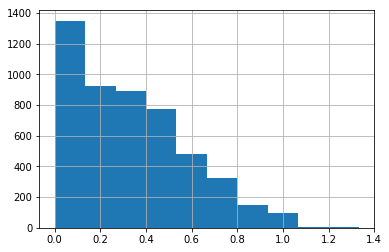

In [99]:
%matplotlib inline
df['prominance_coef'].hist()

In [106]:
df.describe()

,prominance_coef,sentiment_count,superlativnes_count
count,5000.000000,5000.000000,5000.000000
mean,0.323945,0.165800,0.040400
std,0.253763,0.414662,0.205855
min,0.000000,0.000000,0.000000
25%,0.117647,0.000000,0.000000
50%,0.300000,0.000000,0.000000
75%,0.500000,0.000000,0.000000
max,1.333333,3.000000,3.000000


In [107]:
df[df['sentiment_count']>2]

,prominance_coef,sentiment_count,superlativnes_count
"Pelon's Baja Grill -- Healthy, fresh, and delicious with lots of vegetarian options",0.250000,3,0
Historical indie Christian film 'Alone Yet Not Alone' in select theaters today,0.214286,3,0
"Beautiful hair, Beautiful skin, Beautiful brains!",0.000000,3,0
"The truth, the whole truth and nothing but the truth",0.000000,3,0


In [110]:
df[df['superlativnes_count']>2]

,prominance_coef,sentiment_count,superlativnes_count
Serving better and cheaper justice in Ohio: A case for alternative sentencing,0.076923,1,2
The Least and Most Religious States,0.500000,0,2
The best eyelash growth serums that really make skimpy lashes fuller and longer.,0.000000,2,3
"More wineries, less driving in Jordan, Niagara",0.222222,0,2
Summer solstice: Make the most of the longest day of the year,0.538462,0,2
"Best of the best restaurants in Pasco County, 2009",0.300000,2,2
"Scream 4: 'The highest mortality rate' of the franchise, Emma Roberts & Alison Brie speak, & more",0.272727,0,2


In [111]:
df[df['prominance_coef']>0.5]

,prominance_coef,sentiment_count,superlativnes_count
2011-2012 NHL team preview: Detroit Red Wings,0.700000,0,0
Homemade Fish Sticks,1.000000,0,0
Xbox 720 announcement at E3 2013 indicated,0.714286,0,0
NU Hosts Illinois in First Nationally Televised Network Game at Welsh-Ryan,0.846154,0,0
Use Affirmations for Positive Mothering,0.800000,0,0
This year's Bloomsday in Chicago event and the Poetry Pentathalon,0.818182,0,0
Magnificent Mile Art Fest set for July,0.714286,0,0
What's new at Lake Tahoe's Alpine Meadows ski resort this season,0.615385,0,0
Amgen Bicycle Race rolls into Northern California,0.714286,0,0
Just BEcause happy hour for Canvas Art Program,1.000000,1,0


In [119]:
catchy_shmatchy =  df[(((df['sentiment_count']>0)|(df['superlativnes_count']>0))|(df['prominance_coef']>0.5))]
catchy_shmatchy[:5]

,prominance_coef,sentiment_count,superlativnes_count
Talladega turmoil could spell trouble for NASCAR's Chase field,0.400000,1,0
2011-2012 NHL team preview: Detroit Red Wings,0.700000,0,0
Cal coach Jeff Tedford taking a different approach in 2010 -- Part 1,0.307692,1,0
Google science fair to encourage STEM learning,0.285714,1,0
Jersey Shore Season 6 cast's salaries revealed; More than President Obama!,0.285714,0,1


In [123]:
thefile = open('catchy-shmatchy-headlines.txt', 'w',encoding='utf8')
for item in catchy_shmatchy.index.values:
    thefile.write("%s\n" % item)